In [2]:
import sys
# Scikit-Learn ≥0.20 is required
import sklearn
from sklearn.ensemble import RandomForestClassifier
# Common imports
import numpy as np
import seaborn as sns
import os
import pandas as pd
import urllib.request
import folium
from folium.plugins import MarkerCluster
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
def records_data(records_path="/home/faheem/Documents/dmml"):
    csv_path = os.path.join(records_path, "US_Accidents_March23.csv")
    return pd.read_csv(csv_path)

In [4]:
# Now you can call the function
records = records_data()
records.head()  # Display the first five rows

ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          False        False          Night   
1   False  False           False          False        False          Night   
2   False  False           False           True        False          Night   
3   False  False           False          False        False          Night   
4   False  False           False           True        False            Day   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                   Day  
2          Night               Day                   Day  
3            Day               Day                   Day  
4            Day               Day                   Day  

[5 rows x 46 columns]

In [5]:
""" # Assuming records_data() returns the dataset as a DataFrame
records = records_data()

# Find all unique states in the dataset
states = records['State'].unique()

# Print all states
print("States in the dataset:")
for state in states:
    print(state)
 """

' # Assuming records_data() returns the dataset as a DataFrame\nrecords = records_data()\n\n# Find all unique states in the dataset\nstates = records[\'State\'].unique()\n\n# Print all states\nprint("States in the dataset:")\nfor state in states:\n    print(state)\n '

In [7]:
# rows and collumns 
records.shape

(7728394, 46)

In [8]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
records.info() 
#Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values ? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
records["Source"].value_counts() # Obviously Source is a categorical attribuite
# Q3 What does the value_count() method display?

Source1    4325632
Source2    3305373
Source3      97389
Name: Source, dtype: int64

In [10]:
# finding missing values 
missing_data =  records.isnull().sum().sort_values(ascending=False)

# Display columns with missing data
missing_data[missing_data > 0]


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

In [11]:
missing_data = records.isnull().sum()/records.shape[0]*100
missing_data.sort_values(ascending=False)
missing_data[missing_data > 0]

End_Lat                  44.029355
End_Lng                  44.029355
Description               0.000065
Street                    0.140637
City                      0.003274
Zipcode                   0.024779
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition         2.244438
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Nautical_Twilight         0.300787
Astronomical_Twilight     0.300787
dtype: float64

# missing values and not needed so drop the columns 
- End_lat 
- End_lng

# for the ones below we can fill in the missing data with mean or median 
- Precipitation(in) (28.5% missing):  
- Wind_Chill(F) (25.8% missing):
- Wind_Speed(mph), Visibility(mi), Wind_Direction, Humidity(%), Weather_Condition:

# can remove the rows with the missing value 
City
Street
Timezone
Zipcode:

In [54]:
# Drop End_Lat and End_Lng columns due to high missing values
# Country = central , estern , mountain, pacific
# can remove aiports too 
records_cleaned = records.drop(columns=['End_Lat', 'End_Lng', 'Country'])

# Step 1: Ensure Start_Time is in datetime format
records_cleaned['Start_Time'] = pd.to_datetime(records_cleaned['Start_Time'])

# Step 2: Filter for dates only between 2022 and 2023
records_cleaned = records_cleaned[
    (records_cleaned['Start_Time'].dt.year >= 2017) &
    (records_cleaned['Start_Time'].dt.year <= 2019)
]

# Now, 'records_cleaned' only contains rows from the years 2022 and 2023.


In [13]:
# Impute missing numerical columns with the median
records_cleaned['Precipitation(in)'] = records_cleaned['Precipitation(in)'].fillna(records_cleaned['Precipitation(in)'].median())
records_cleaned['Temperature(F)'] = records_cleaned['Temperature(F)'].fillna(records_cleaned['Temperature(F)'].median())
records_cleaned['Wind_Chill(F)'] = records_cleaned['Wind_Chill(F)'].fillna(records_cleaned['Wind_Chill(F)'].median())
records_cleaned['Wind_Speed(mph)'] = records_cleaned['Wind_Speed(mph)'].fillna(records_cleaned['Wind_Speed(mph)'].median())
records_cleaned['Humidity(%)'] = records_cleaned['Humidity(%)'].fillna(records_cleaned['Humidity(%)'].median())
records_cleaned['Visibility(mi)'] = records_cleaned['Visibility(mi)'].fillna(records_cleaned['Visibility(mi)'].median())
records_cleaned['Pressure(in)'] = records_cleaned['Pressure(in)'].fillna(records_cleaned['Pressure(in)'].median())


# Impute missing categorical columns with the mode
records_cleaned['Weather_Condition'] = records_cleaned['Weather_Condition'].fillna(records_cleaned['Weather_Condition'].mode()[0])
records_cleaned['Wind_Direction'] = records_cleaned['Wind_Direction'].fillna(records_cleaned['Wind_Direction'].mode()[0])


In [14]:
# Drop rows where important columns like City, Street, or Timezone are missing
records_cleaned = records_cleaned.dropna(subset=['City', 'Street', 'Timezone'])
# Identify the top 3 states with the most accidents
#top_3_states = ['CA', 'FL', 'TX']
top_1_states = ['CA']

# Drop rows where the 'State' column does not contain one of the top 3 states
records_cleaned = records_cleaned[records_cleaned['State'].isin(top_1_states)]

# Check the size of the new filtered `records_cleaned`
print(records_cleaned.shape)

(448623, 43)


In [15]:
# Forward fill twilight-related columns
records_cleaned['Nautical_Twilight'] = records_cleaned['Nautical_Twilight'].fillna(method='ffill')
records_cleaned['Civil_Twilight'] = records_cleaned['Civil_Twilight'].fillna(method='ffill')
records_cleaned['Astronomical_Twilight'] = records_cleaned['Astronomical_Twilight'].fillna(method='ffill')
records_cleaned['Sunrise_Sunset'] = records_cleaned['Sunrise_Sunset'].fillna(method='ffill')
records_cleaned['Weather_Timestamp'] = records_cleaned['Weather_Timestamp'].fillna(method='ffill')



In [16]:
# Fill missing Airport_Code with a placeholder
records_cleaned['Airport_Code'] = records_cleaned['Airport_Code'].fillna('Unknown')
records_cleaned['Description'] = records_cleaned['Description'].fillna('Na')


In [17]:
# finding duplicates 
records_cleaned.duplicated().sum()

0

In [18]:
# Standardize wind direction
records_cleaned['Wind_Direction'] = records_cleaned['Wind_Direction'].str.upper()
records_cleaned['Wind_Direction'].replace({
    'CALM': 'CALM', 'SOUTH': 'S', 'WEST': 'W', 'NORTH': 'N', 'EAST': 'E', 'VARIABLE': 'VAR'
}, inplace=True)


In [19]:
# Check unique weather conditions to find inconsistencies
unique_conditions = records_cleaned['Weather_Condition'].unique()
print(unique_conditions)


['Fair' 'Haze' 'Mostly Cloudy' 'Partly Cloudy' 'Light Rain' 'Smoke'
 'Fair / Windy' 'Cloudy' 'Fog' 'Light Rain / Windy'
 'Partly Cloudy / Windy' 'Showers in the Vicinity' 'Mostly Cloudy / Windy'
 'Cloudy / Windy' 'Thunder in the Vicinity' 'Smoke / Windy' 'T-Storm'
 'Light Rain with Thunder' 'Thunder' 'Haze / Windy' 'Drizzle'
 'Patches of Fog' 'Heavy Rain' 'Rain' 'Light Snow' 'Rain / Windy'
 'Heavy Snow' 'Snow' 'Light Snow / Windy' 'Fog / Windy' 'Light Drizzle'
 'Shallow Fog' 'N/A Precipitation' 'Mist' 'Heavy T-Storm'
 'Widespread Dust' 'Wintry Mix' 'Blowing Snow' 'Mist / Windy'
 'T-Storm / Windy' 'Heavy Rain / Windy' 'Light Rain Shower'
 'Rain Shower / Windy' 'Hail' 'Rain Shower' 'Light Snow Shower'
 'Heavy Drizzle' 'Heavy Snow / Windy' 'Blowing Dust / Windy'
 'Heavy T-Storm / Windy' 'Widespread Dust / Windy' 'Small Hail'
 'Blowing Dust' 'Snow and Thunder' 'Snow / Windy' 'Light Drizzle / Windy'
 'Drizzle / Windy' 'Light Rain Shower / Windy' 'Thunder / Windy'
 'Thunder and Hail' 'Light 

In [20]:
# Define a mapping to group similar weather conditions
weather_mapping = {
    'clear': 'Clear',
    'fair': 'Clear',
    'partly cloudy': 'Cloudy',
    'mostly cloudy': 'Cloudy',
    'scattered clouds': 'Cloudy',
    'cloudy': 'Cloudy',
    'overcast': 'Cloudy',
    'haze': 'Foggy',
    'fog': 'Foggy',
    'patches of fog': 'Foggy',
    'shallow fog': 'Foggy',
    'light drizzle': 'Rainy',
    'drizzle': 'Rainy',
    'heavy drizzle': 'Rainy',
    'rain': 'Rainy',
    'heavy rain': 'Rainy',
    'light rain': 'Rainy',
    'light rain showers': 'Rainy',
    'rain shower': 'Rainy',
    'rain / windy': 'Rainy',
    'light rain / windy': 'Rainy',
    'thunderstorm': 'Stormy',
    't-storm': 'Stormy',
    'thunderstorms and rain': 'Stormy',
    'light thunderstorms and rain': 'Stormy',
    'heavy t-storm': 'Stormy',
    'thunder in the vicinity': 'Stormy',
    'thunder': 'Stormy',
    'thunder / windy': 'Stormy',
    'thunder and hail': 'Stormy',
    'snow': 'Snowy',
    'light snow': 'Snowy',
    'heavy snow': 'Snowy',
    'wintry mix': 'Snowy',
    'blowing snow': 'Snowy',
    'snow / windy': 'Snowy',
    'light snow showers': 'Snowy',
    'heavy snow / windy': 'Snowy',
    'volcanic ash': 'Dusty',
    'duststorm': 'Dusty',
    'blowing sand': 'Dusty',
    'blowing dust': 'Dusty',
    'dust whirls': 'Dusty',
    'widespread dust': 'Dusty',
    'blowing dust / windy': 'Dusty',
    'sand / windy': 'Dusty',
    'mist': 'Foggy',
    'mist / windy': 'Foggy',
    'squalls': 'Windy',
    'squalls / windy': 'Windy',
    'small hail': 'Hail',
    'light hail': 'Hail',
    'hail': 'Hail',
    'showers in the vicinity': 'Rainy',
    'n/a precipitation': 'Unknown',
    'heavy t-storm / windy': 'Stormy',
    # Add more mappings as needed...
}

# Convert the weather conditions to lowercase
records_cleaned['Weather_Condition'] = records_cleaned['Weather_Condition'].str.lower()

# Apply the mapping
records_cleaned['Weather_Condition_Cleaned'] = records_cleaned['Weather_Condition'].map(weather_mapping).fillna('Other')

# Check the unique values after cleaning
cleaned_conditions = records_cleaned['Weather_Condition_Cleaned'].unique()
print(cleaned_conditions)


['Clear' 'Foggy' 'Cloudy' 'Rainy' 'Other' 'Stormy' 'Snowy' 'Unknown'
 'Dusty' 'Hail']


In [21]:
# Standardize Zipcodes to first 5 digits
records_cleaned['Zipcode'] = records_cleaned['Zipcode'].str[:5]


In [22]:
# identifying garbage values 
for i in records_cleaned.select_dtypes(include="object").columns:
 print(records_cleaned[i].value_counts())
 print("***"*10)

A-512231     1
A-4795929    1
A-4795996    1
A-4795995    1
A-4795986    1
            ..
A-4126259    1
A-4126255    1
A-4126241    1
A-4126240    1
A-5464716    1
Name: ID, Length: 448623, dtype: int64
******************************
Source1    411955
Source2     32035
Source3      4633
Name: Source, dtype: int64
******************************
2022-08-04 14:28:11              27
2022-07-29 08:51:46              26
2022-08-05 11:58:41              25
2022-08-05 16:28:49              25
2023-02-13 00:01:09              24
                                 ..
2022-09-02 14:38:00               1
2022-05-30 16:45:30               1
2023-01-04 18:39:51               1
2022-03-10 08:24:00               1
2022-08-25 11:00:54.000000000     1
Name: End_Time, Length: 391098, dtype: int64
******************************
Incident on CA-63 NB near VISALIA Road closed. Take alternate route.                                                                                                695
Incident on C

In [23]:
records_cleaned.describe() 


Severity      Start_Lat      Start_Lng   Distance(mi)  \
count  448623.000000  448623.000000  448623.000000  448623.000000   
mean        2.032392      35.689329    -119.483703       1.033017   
std         0.256784       2.141805       1.918684       2.105575   
min         1.000000      32.543605    -124.374965       0.000000   
25%         2.000000      33.986050    -121.432255       0.061000   
50%         2.000000      34.323556    -118.472904       0.286000   
75%         2.000000      37.710746    -117.900173       1.024000   
max         4.000000      42.005364    -114.156175      52.621000   

       Temperature(F)  Wind_Chill(F)    Humidity(%)   Pressure(in)  \
count   448623.000000  448623.000000  448623.000000  448623.000000   
mean        63.339049      62.970392      56.743838      29.489288   
std         14.391010      14.858228      24.641228       0.909393   
min         -8.000000     -28.000000       2.000000      19.310000   
25%         54.000000      54.000000      37.000000      29.370000   
50%         63.000000      63.000000      59.000000      29.770000   
75%         72.000000      72.000000      77.000000      29.940000   
max        207.000000     207.000000     100.000000      58.390000   

       Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  
count   448623.000000    448623.000000      448623.000000  
mean         9.224512         6.507321           0.003016  
std          2.343099         5.424560           0.022662  
min          0.000000         0.000000           0.000000  
25%         10.000000         3.000000           0.000000  
50%         10.000000         6.000000           0.000000  
75%         10.000000         9.000000           0.000000  
max        100.000000       190.000000           2.050000

/tmp/ipykernel_13584/294497503.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_state.index, y=accidents_by_state.values, palette='viridis')


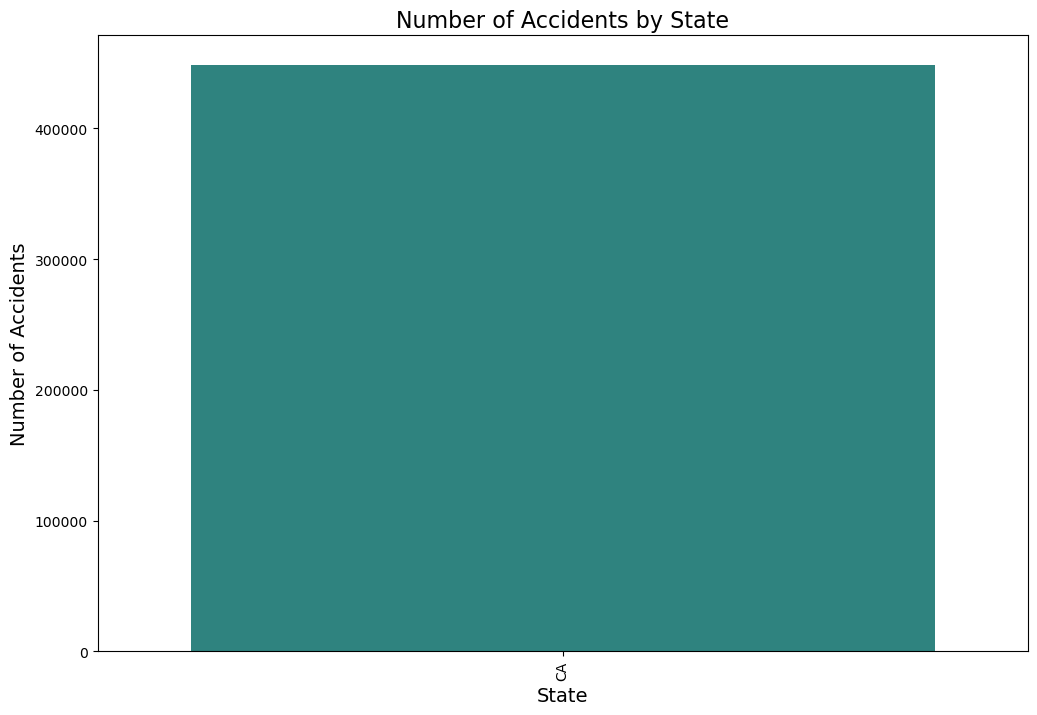

In [24]:
# Group the data by 'State' and count the number of accidents
accidents_by_state = records_cleaned['State'].value_counts()

# Plot the accidents by state
plt.figure(figsize=(12,8))
sns.barplot(x=accidents_by_state.index, y=accidents_by_state.values, palette='viridis')
plt.title('Number of Accidents by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=90)  # Rotate state labels for better readability
plt.show()

<Axes: title={'center': 'Distribution of Accident Severity'}>

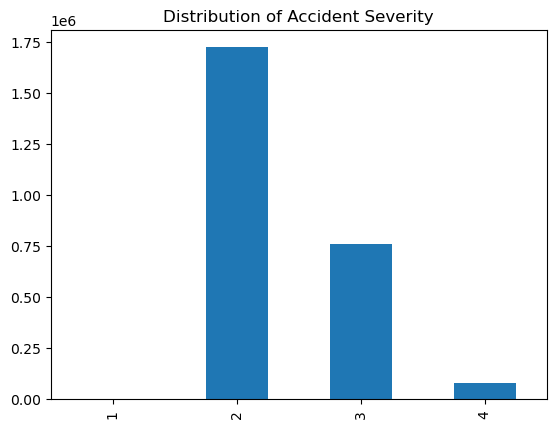

In [52]:
# Sort severity levels in numerical order
records_cleaned['Severity'].value_counts().sort_index().plot(kind='bar', title='Distribution of Accident Severity')


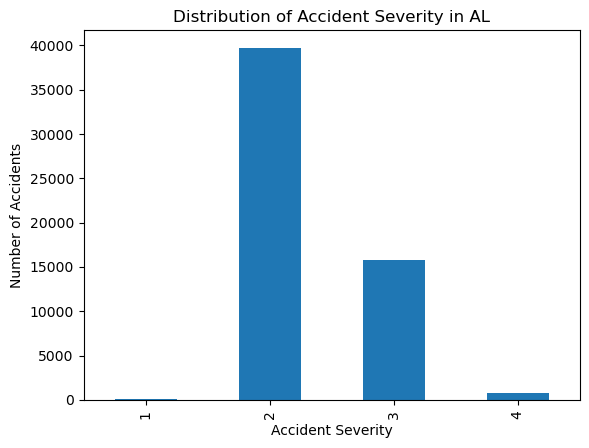

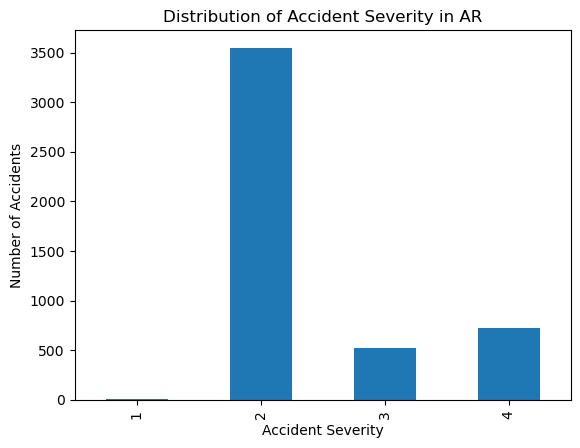

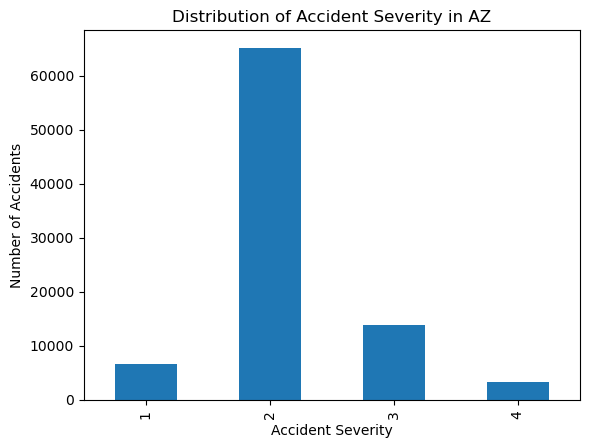

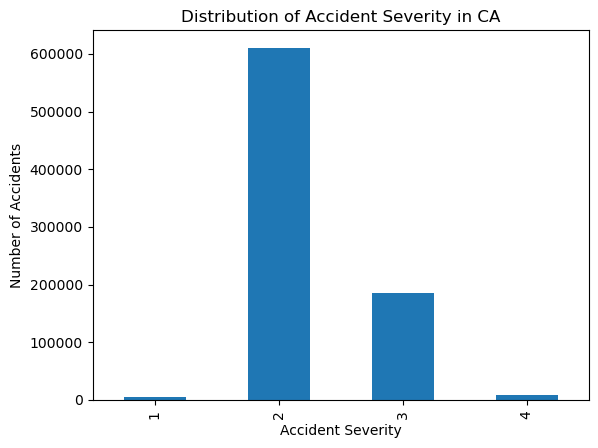

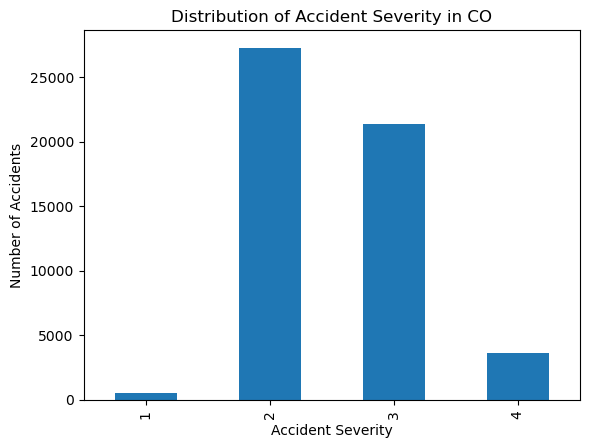

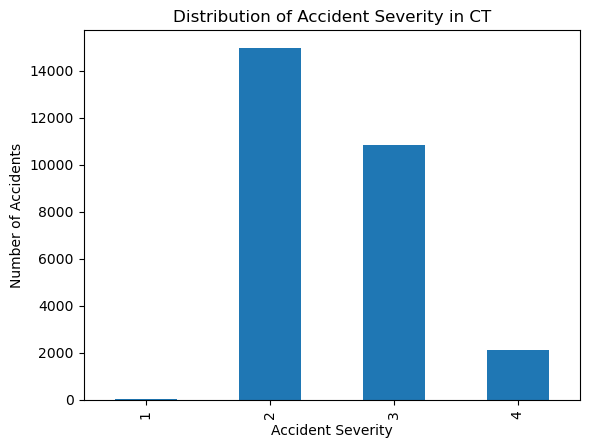

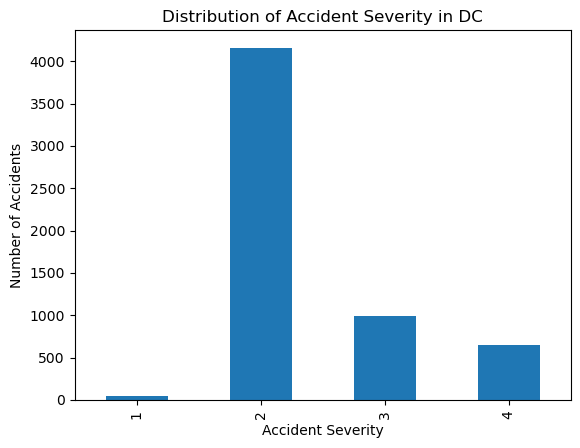

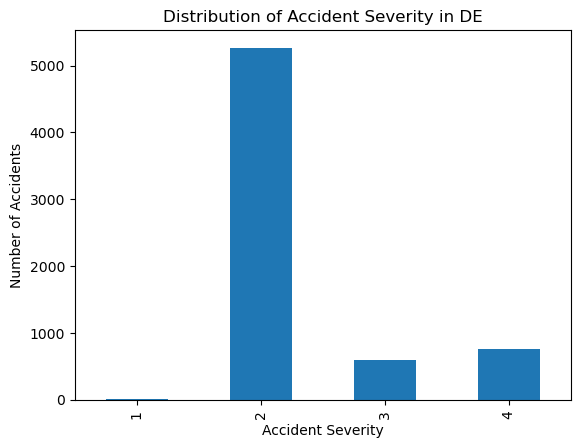

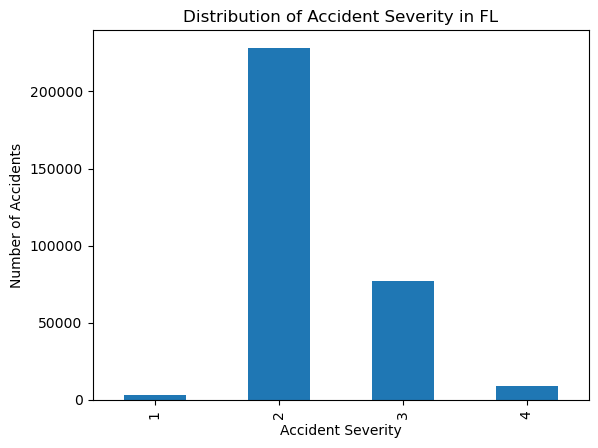

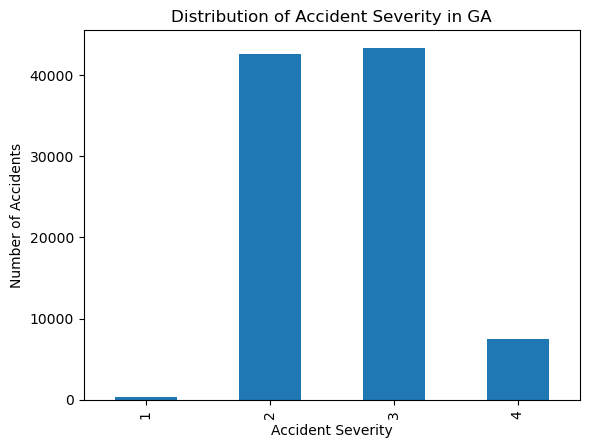

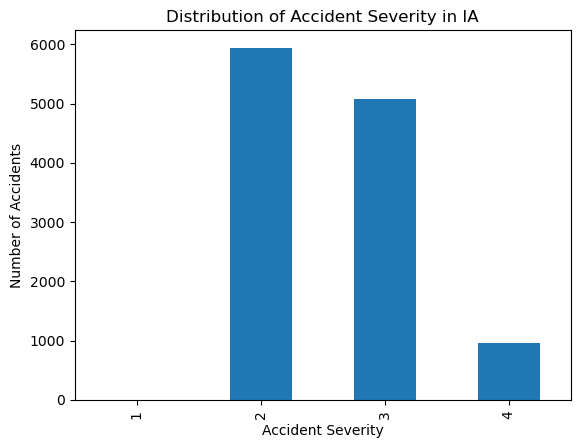

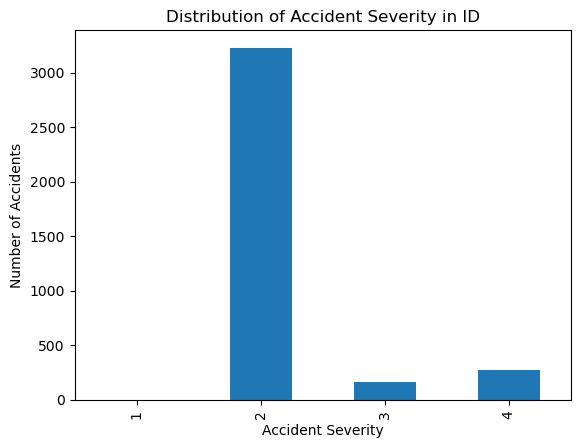

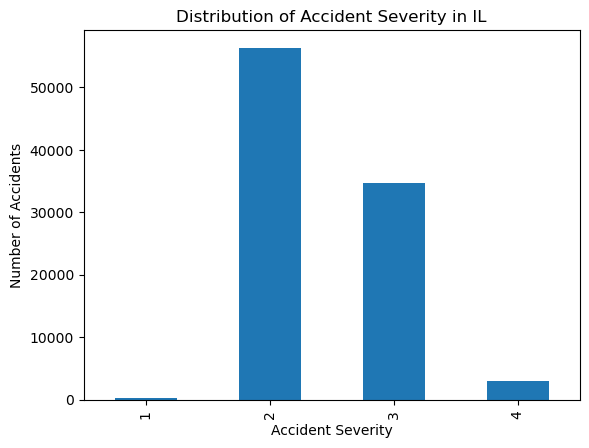

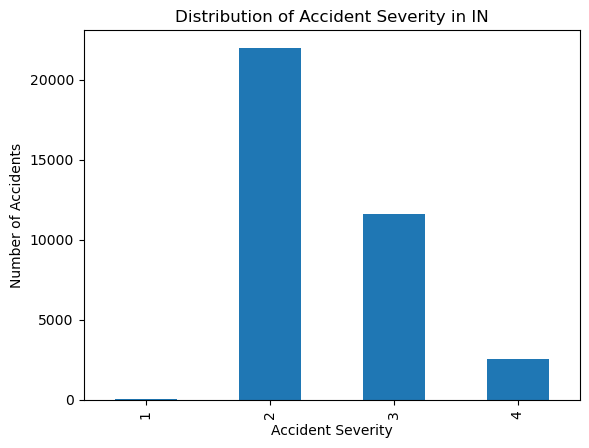

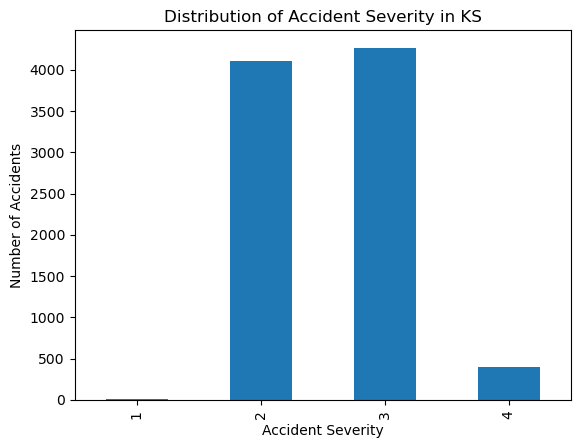

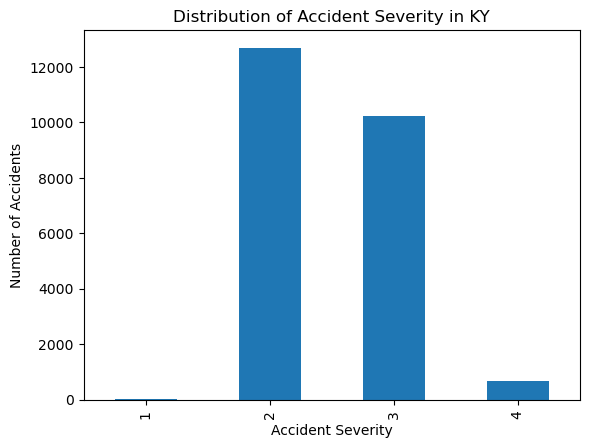

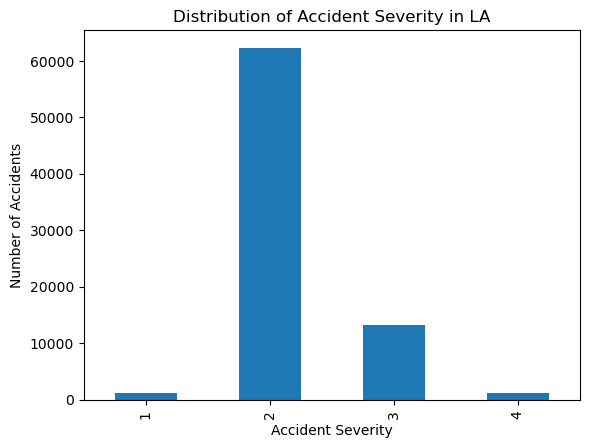

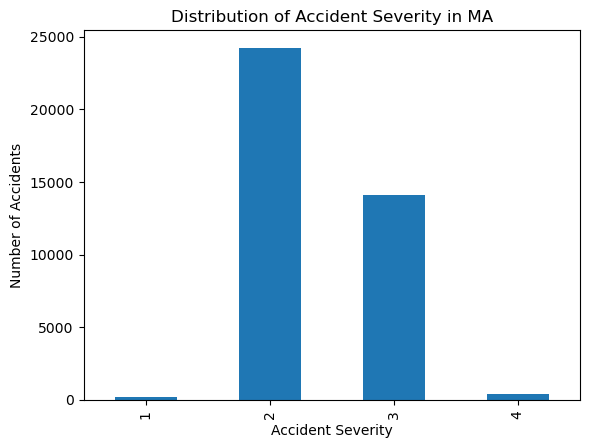

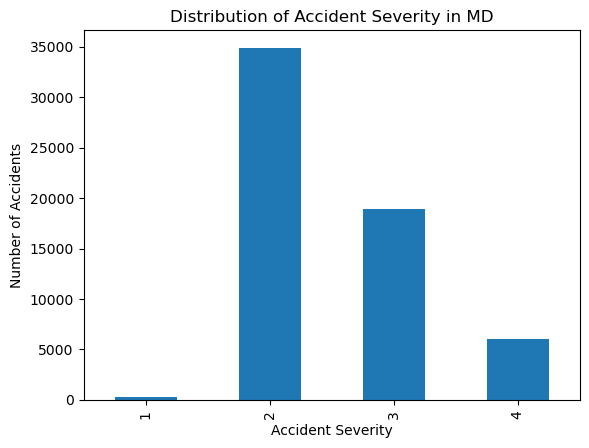

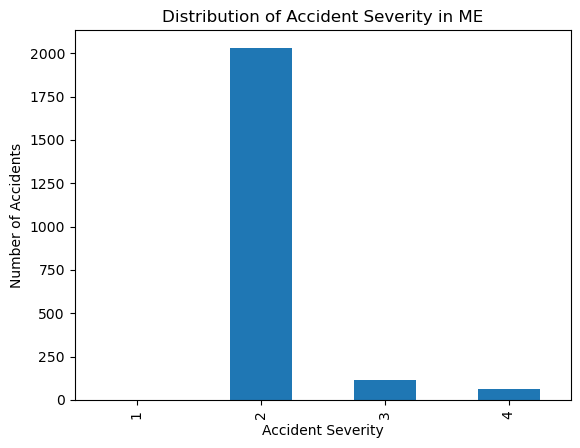

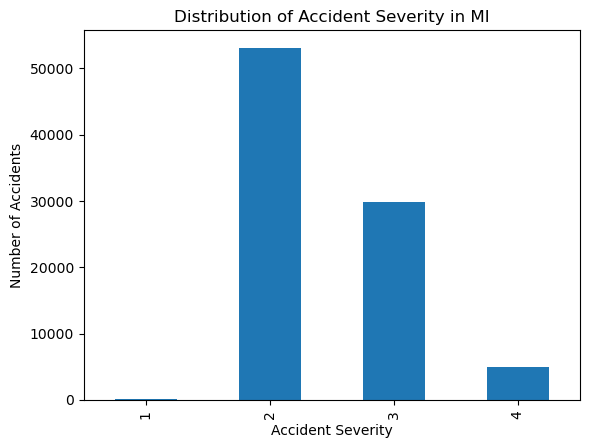

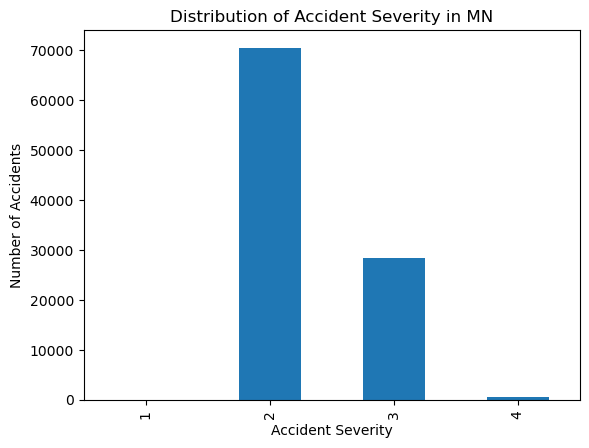

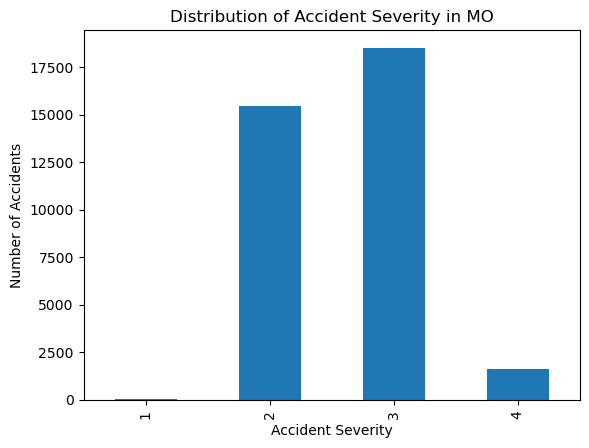

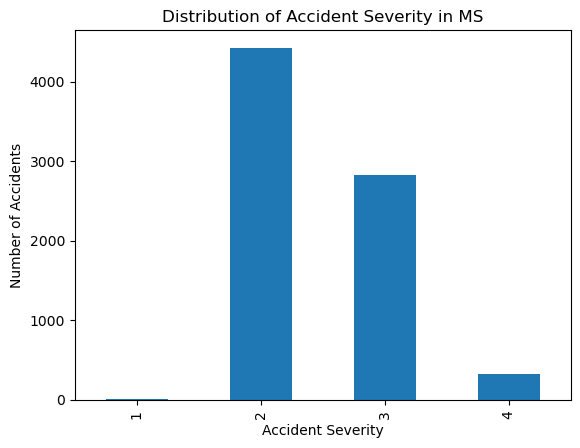

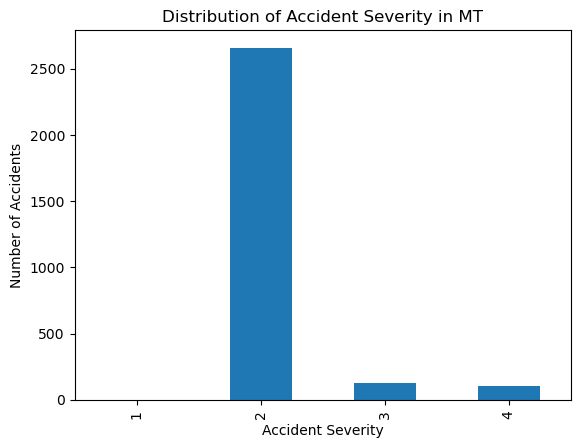

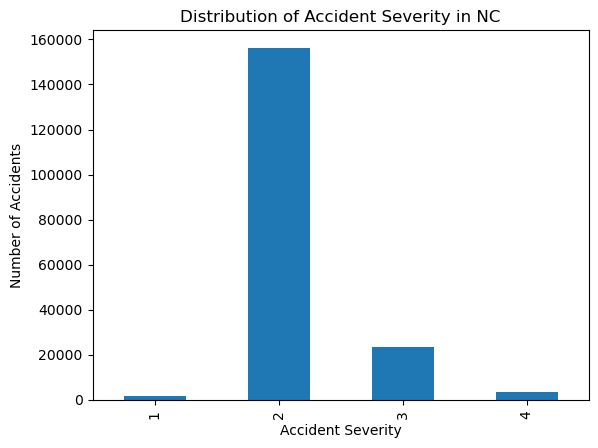

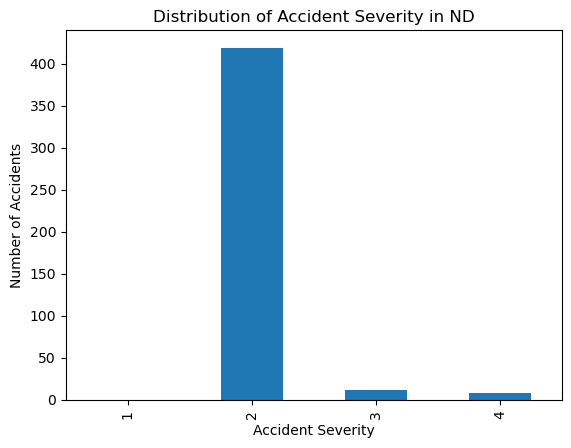

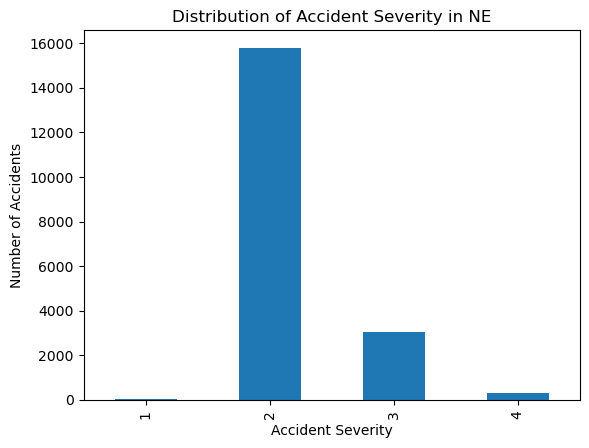

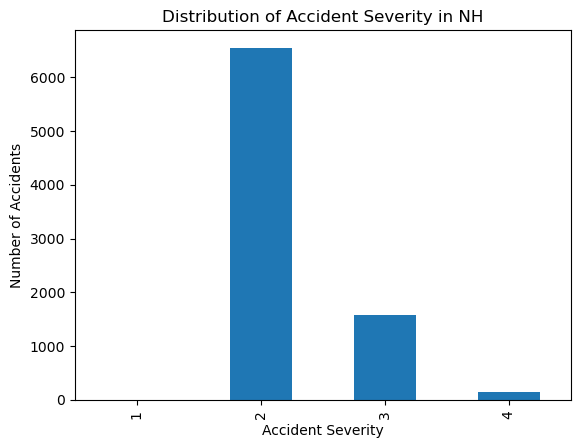

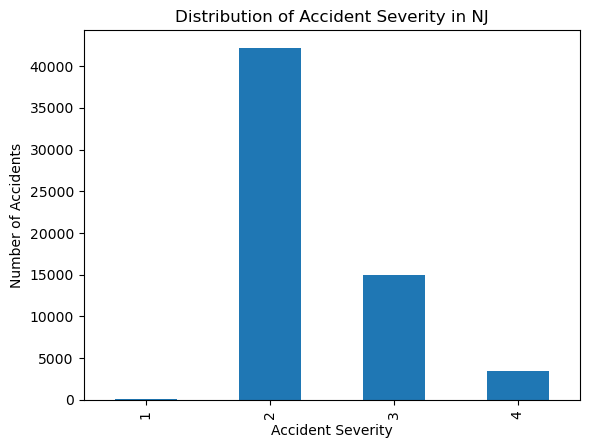

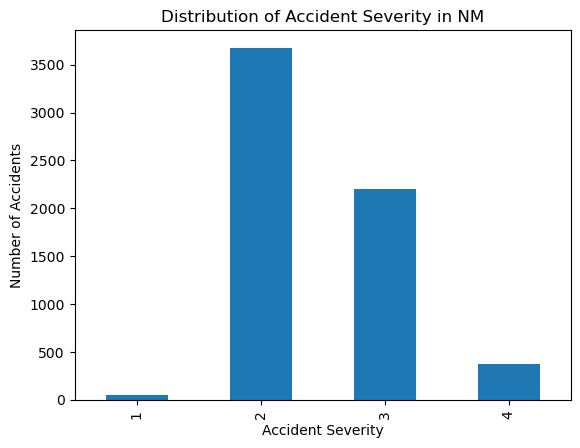

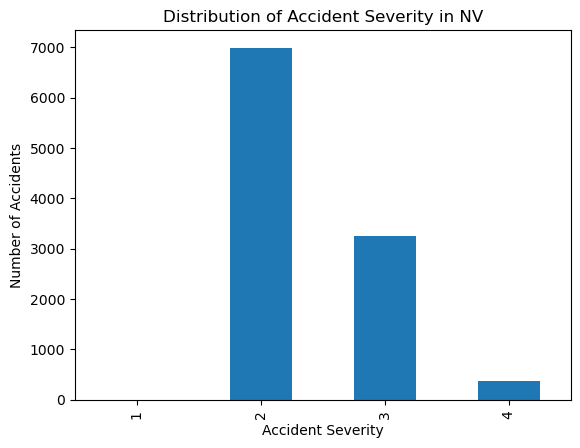

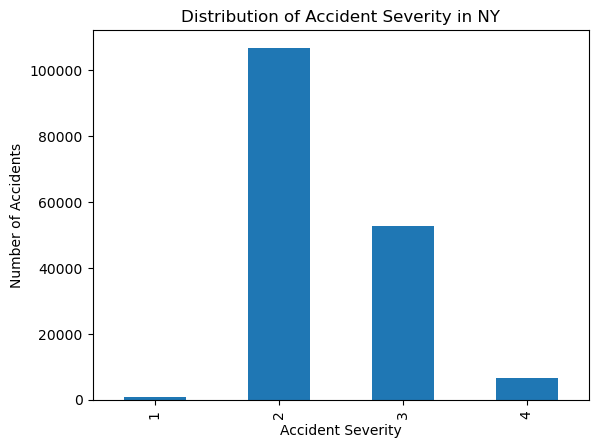

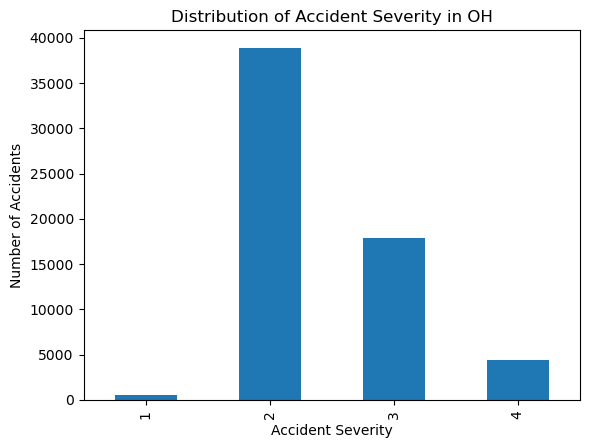

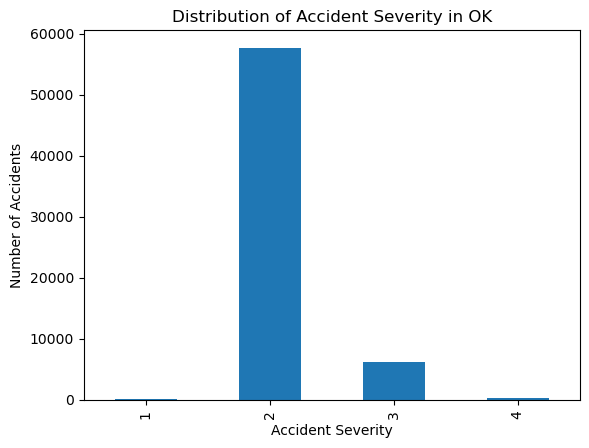

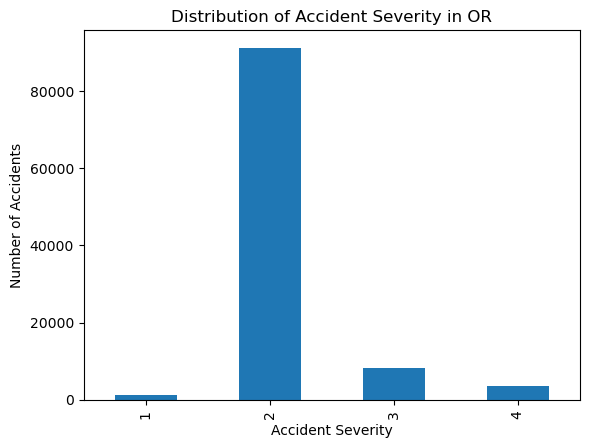

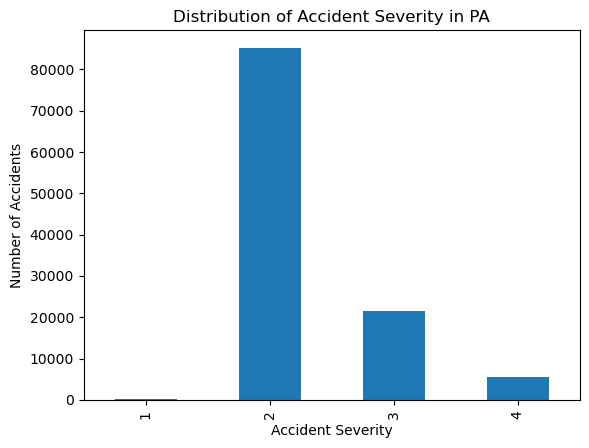

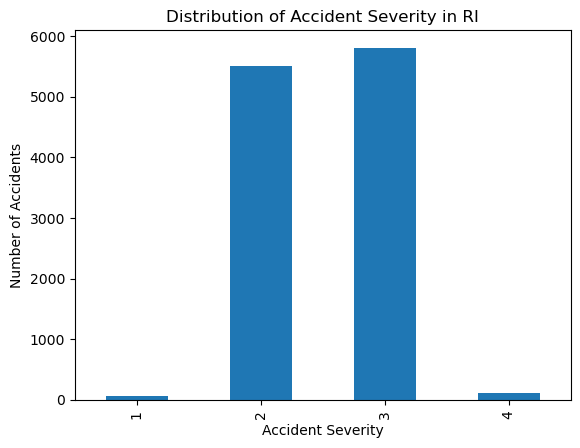

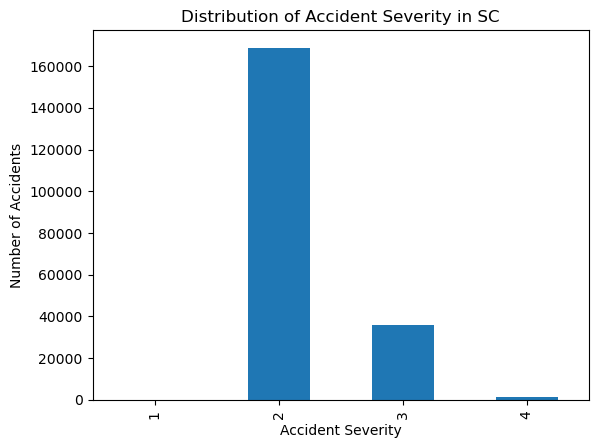

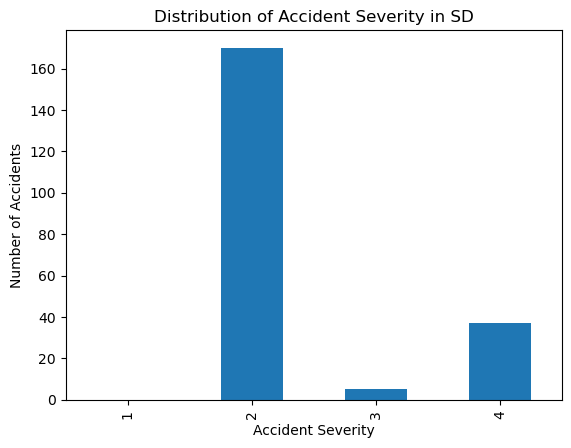

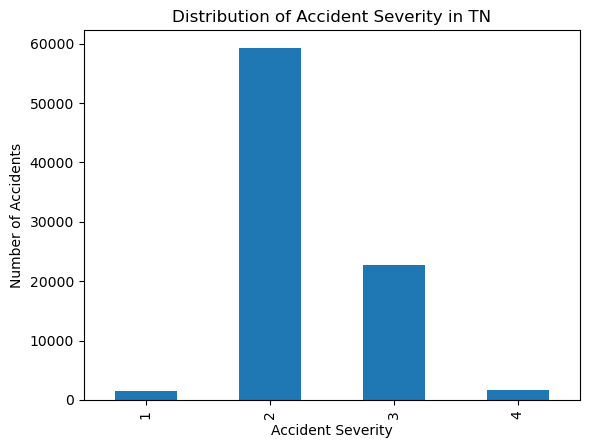

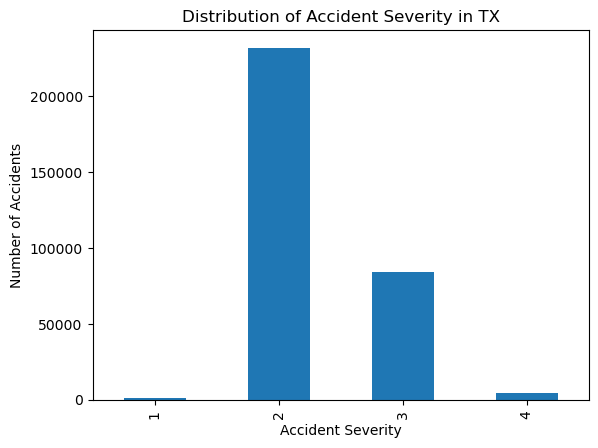

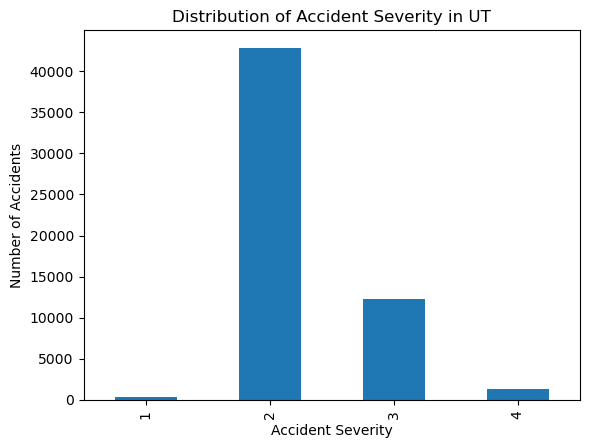

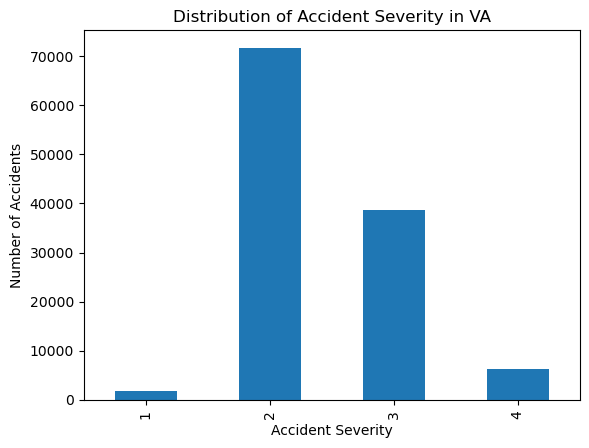

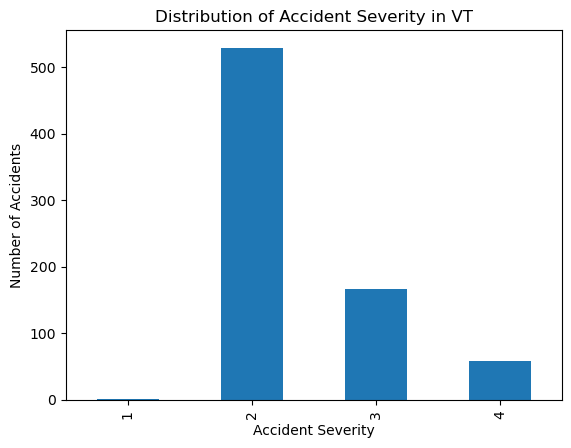

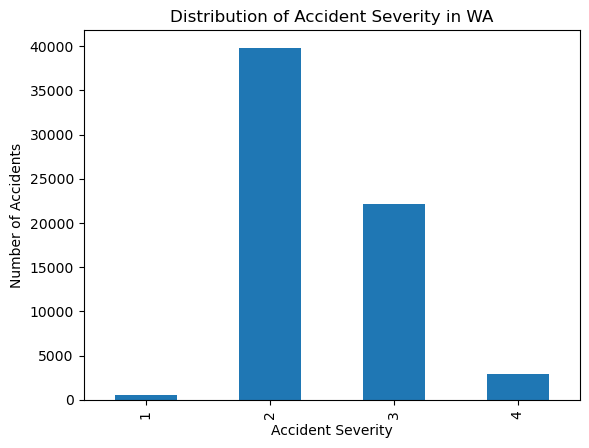

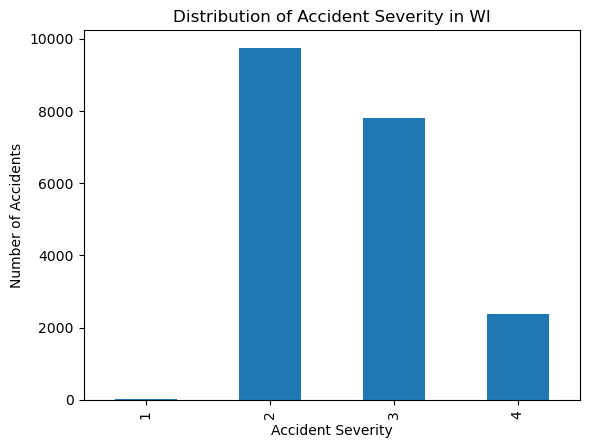

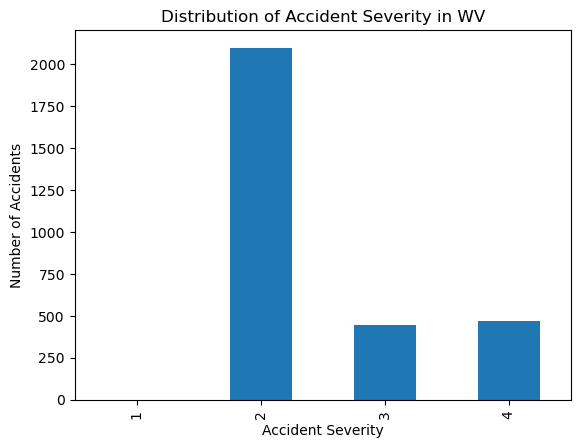

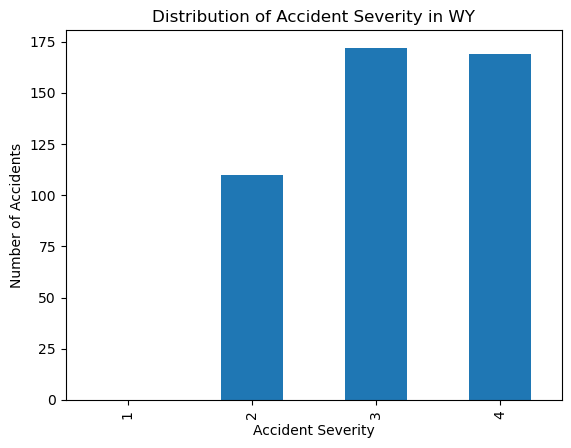

The state with the most proportional accident severity distribution is WY with a variance of 0.0318


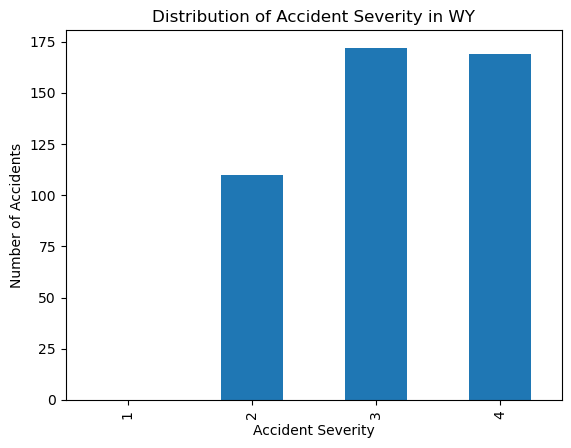

  State  Hour Weather_Condition  Traffic_Signal  Severity
0    AL     0             Clear           False  3.222222
1    AL     0            Cloudy           False  2.094828
2    AL     0            Cloudy            True  2.000000
3    AL     0              Fair           False  2.106888
4    AL     0              Fair            True  2.000000


In [55]:
# Group by State and Severity to get the count of each severity level by state
severity_by_state = records_cleaned.groupby(['State', 'Severity']).size().unstack(fill_value=0)

# Plot accident severity distribution for all states
def plot_severity_distribution(state_data, state_name):
    state_data.plot(kind='bar')
    plt.title(f'Distribution of Accident Severity in {state_name}')
    plt.ylabel('Number of Accidents')
    plt.xlabel('Accident Severity')
    plt.show()

# Iterate over each state and plot severity distribution
for state in severity_by_state.index:
    state_data = severity_by_state.loc[state]
    plot_severity_distribution(state_data, state)

# Function to calculate severity proportionality for a state
def calculate_proportionality(state_data):
    total_accidents = state_data.sum()
    proportions = state_data / total_accidents
    return proportions

# Evaluate proportionality for all states
state_proportionality = {}
for state in severity_by_state.index:
    state_data = severity_by_state.loc[state]
    proportionality = calculate_proportionality(state_data)
    state_proportionality[state] = proportionality

# Find a state with the most proportional severity distribution
def find_most_proportional_state(proportionality_dict):
    variance_by_state = {state: proportions.var() for state, proportions in proportionality_dict.items()}
    most_proportional_state = min(variance_by_state, key=variance_by_state.get)
    return most_proportional_state, variance_by_state[most_proportional_state]

# Get the state with the most proportional accident severity distribution
most_proportional_state, variance = find_most_proportional_state(state_proportionality)

print(f"The state with the most proportional accident severity distribution is {most_proportional_state} with a variance of {variance:.4f}")

# Plot the distribution for the most proportional state
plot_severity_distribution(severity_by_state.loc[most_proportional_state], most_proportional_state)

# Additional feature extraction: Time, Weather, and Road Conditions

# Convert Start_Time to datetime
records['Start_Time'] = pd.to_datetime(records['Start_Time'])

# Extract features from Start_Time (Hour of the day)
records['Hour'] = records['Start_Time'].dt.hour

# Group by State, Hour, Weather_Condition, and Traffic_Signal to see their relationship with Severity
severity_time_weather = records.groupby(['State', 'Hour', 'Weather_Condition', 'Traffic_Signal'])['Severity'].mean().reset_index()

# Display a sample of this grouped data
print(severity_time_weather.head())

# Now you can continue exploring the effects of time, weather, and traffic signal presence on severity


/tmp/ipykernel_13584/1598027863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


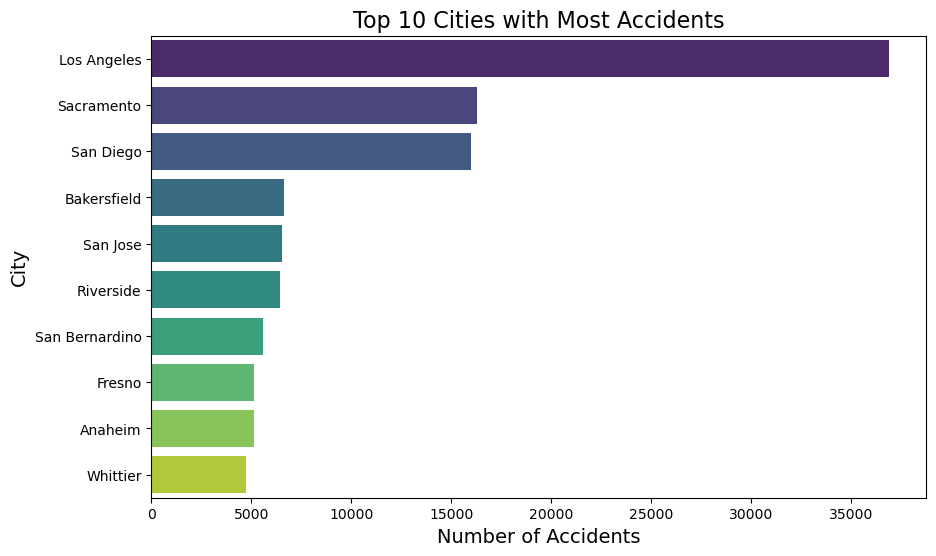

In [26]:

# Top 10 cities with the most accidents
top_cities = records_cleaned['City'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.title('Top 10 Cities with Most Accidents', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.show()


0


/tmp/ipykernel_13584/414410269.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=records_cleaned, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='plasma')


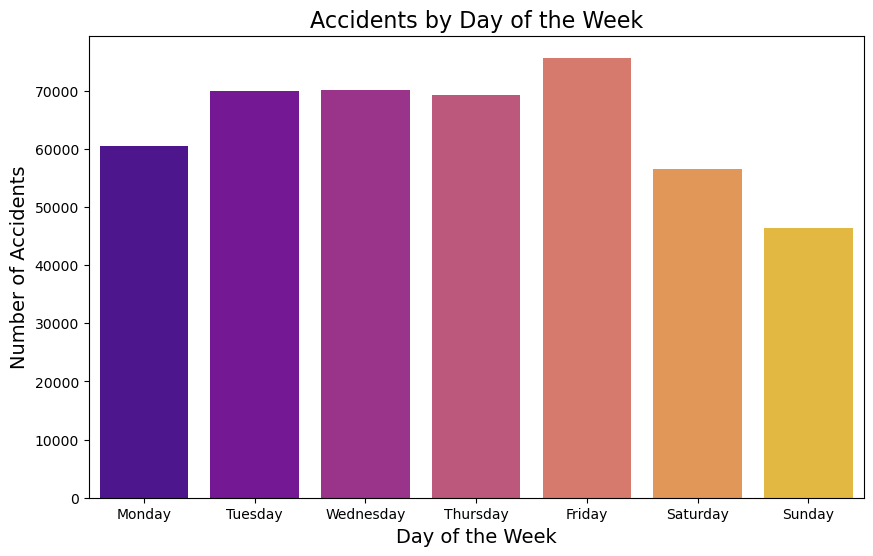

In [27]:
# Convert 'Start_Time' to datetime format
records_cleaned['Start_Time'] = pd.to_datetime(records_cleaned['Start_Time'], errors='coerce')

# After conversion, check for any null values in 'Start_Time' to avoid errors
print(records_cleaned['Start_Time'].isnull().sum())  # This will tell you how many rows have invalid dates

# Drop rows where 'Start_Time' could not be converted to datetime
records_cleaned = records_cleaned.dropna(subset=['Start_Time'])

# Now, extract the day of the week
records_cleaned['DayOfWeek'] = records_cleaned['Start_Time'].dt.day_name()

# Plot accidents by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='DayOfWeek', data=records_cleaned, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='plasma')
plt.title('Accidents by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.show()

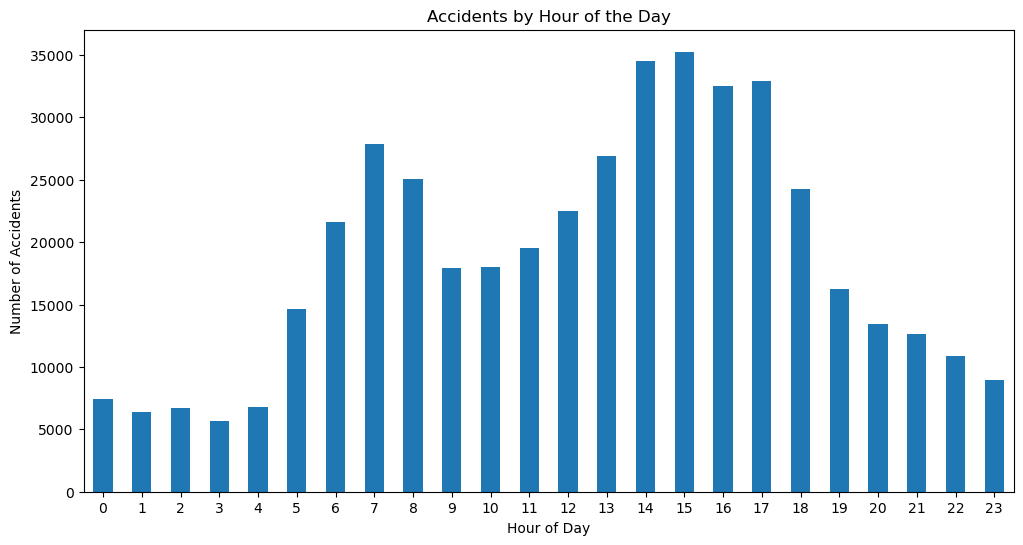

In [28]:
# Convert Start_Time to datetime
records_cleaned['Start_Time'] = pd.to_datetime(records_cleaned['Start_Time'])

# Extract the hour from Start_Time
records_cleaned['Hour'] = records_cleaned['Start_Time'].dt.hour

# Plot the distribution of accidents by hour of the day
plt.figure(figsize=(12, 6))
records_cleaned['Hour'].value_counts().sort_index().plot(kind='bar', title='Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()


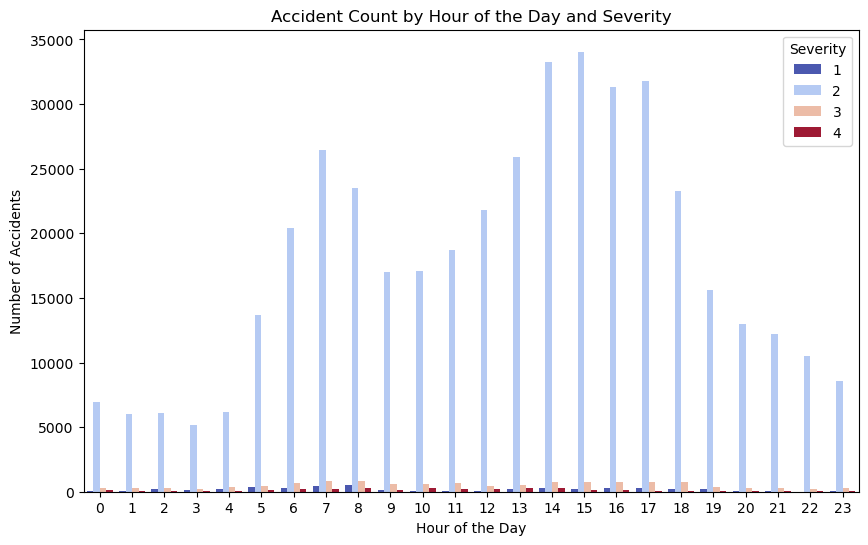

In [29]:

# Convert 'Start_Time' to datetime and extract the hour
records_cleaned['Hour'] = pd.to_datetime(records_cleaned['Start_Time']).dt.hour

# Scatter plot showing accidents based on Hour of the day and Severity
plt.figure(figsize=(10,6))

# Scatter plot with x as Hour and hue as Severity
sns.countplot(
    x='Hour', 
    hue='Severity', 
    data=records_cleaned, 
    palette='coolwarm'
)

# Titles and labels
plt.title("Accident Count by Hour of the Day and Severity")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.legend(title="Severity")
plt.show()


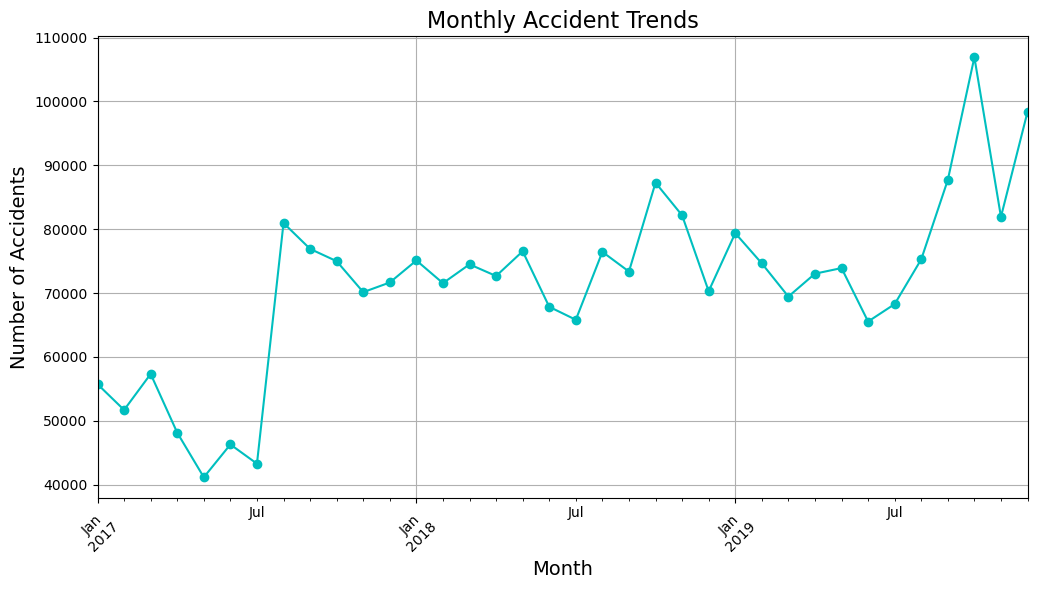

In [51]:
# Extract month and year from 'Start_Time'
records_cleaned['Month'] = records_cleaned['Start_Time'].dt.to_period('M')

# Plot accidents by month
monthly_accidents = records_cleaned['Month'].value_counts().sort_index()

plt.figure(figsize=(12,6))
monthly_accidents.plot(kind='line', marker='o', color='c')
plt.title('Monthly Accident Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_13584/2303940903.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Traffic_Signal', y='Severity', data=records_cleaned, estimator=lambda x: len(x), ci=None)


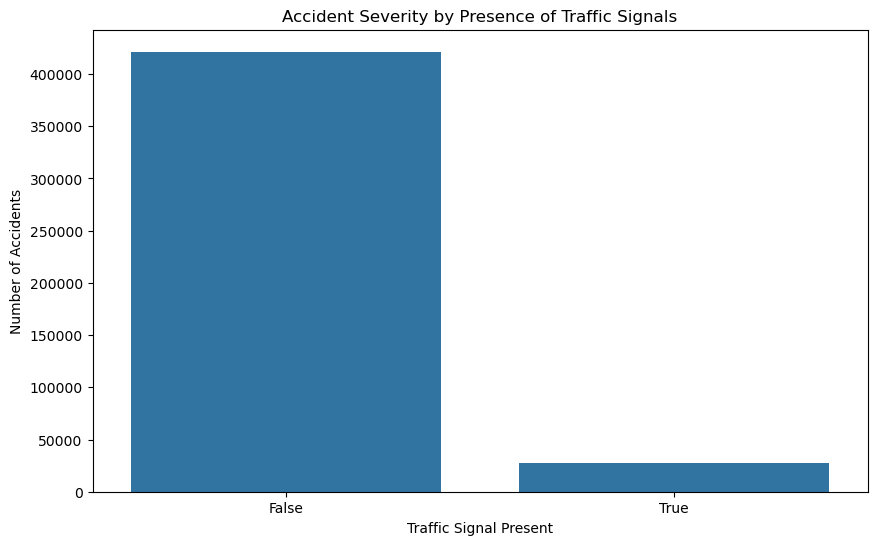

In [31]:
# Plot a bar chart showing the relationship between Traffic Signals and Severity
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic_Signal', y='Severity', data=records_cleaned, estimator=lambda x: len(x), ci=None)
plt.title('Accident Severity by Presence of Traffic Signals')
plt.xlabel('Traffic Signal Present')
plt.ylabel('Number of Accidents')
plt.show()

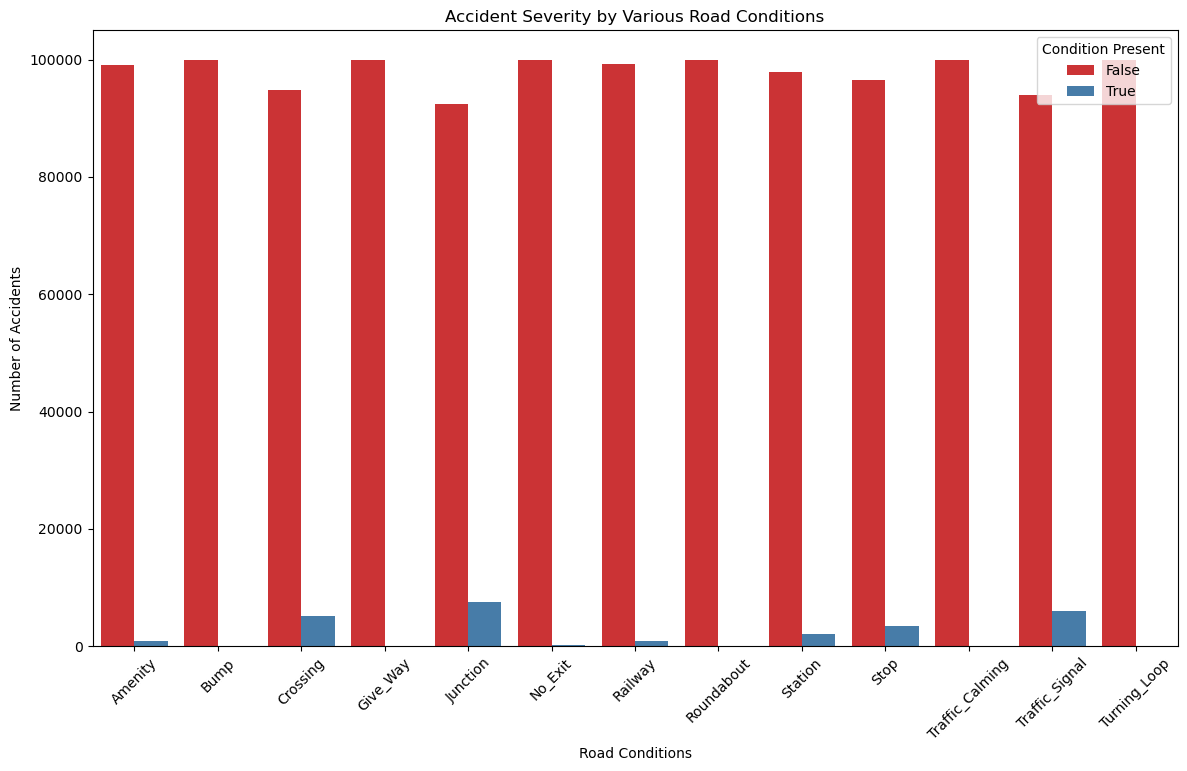

In [32]:
# Subsample the dataset to speed up the plot (e.g., use the first 100,000 rows)
subset_records_cleaned = records_cleaned.sample(n=100000, random_state=42)

# Define all the road condition columns
road_conditions = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop'
]

# Melt the DataFrame for easier plotting
melted = subset_records_cleaned.melt(id_vars='Severity', value_vars=road_conditions, 
                                     var_name='Road_Condition', value_name='Condition_Present')

# Plot the data as a grouped bar chart
plt.figure(figsize=(14, 8))
sns.countplot(data=melted, x='Road_Condition', hue='Condition_Present', palette='Set1')
plt.title('Accident Severity by Various Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.legend(title='Condition Present')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_13584/1272996011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=condition_sums.index, y=condition_sums.values, palette='viridis')


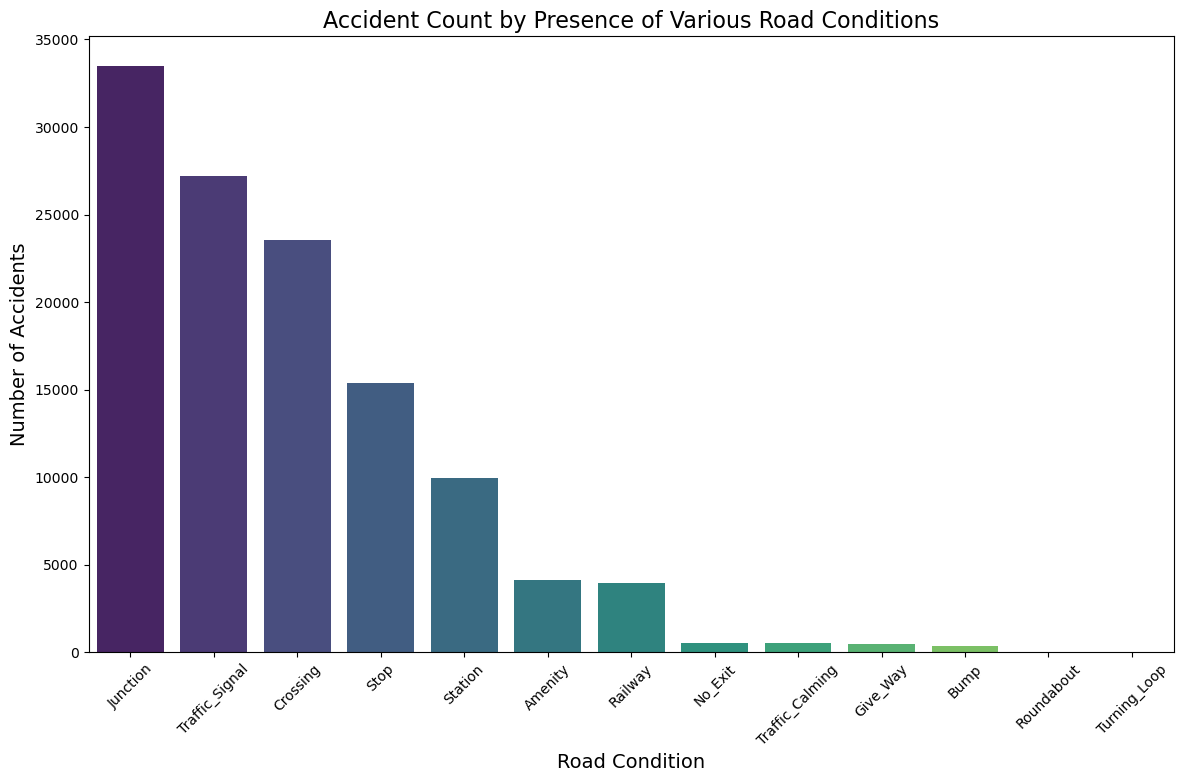

In [33]:

# List of road condition columns (these columns should have boolean values True/False)
road_conditions = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop'
]

# Plot accident counts by presence or absence of road conditions
plt.figure(figsize=(14,8))
condition_sums = records_cleaned[road_conditions].sum().sort_values(ascending=False)
sns.barplot(x=condition_sums.index, y=condition_sums.values, palette='viridis')

plt.title('Accident Count by Presence of Various Road Conditions', fontsize=16)
plt.xlabel('Road Condition', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.show()


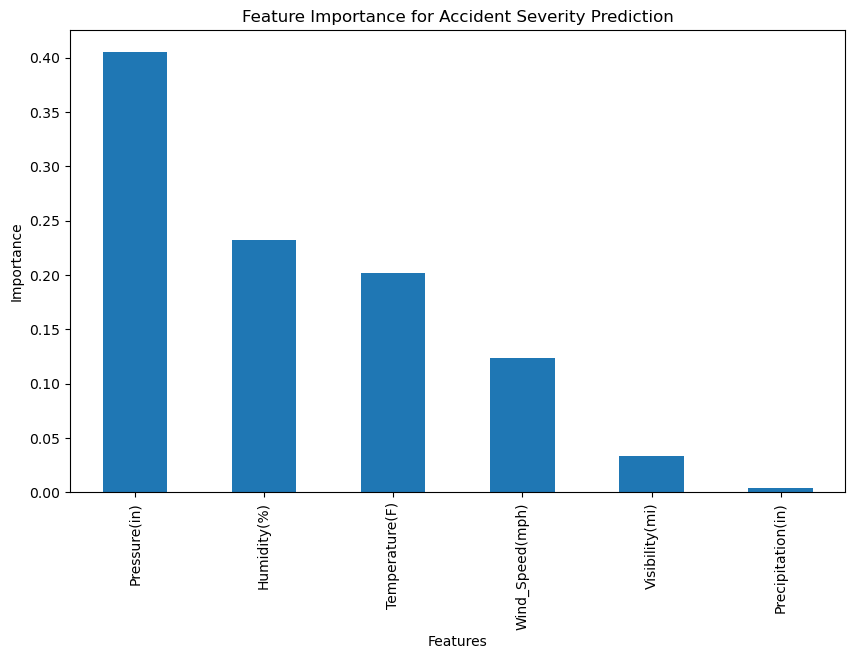

In [34]:

# Make sure records_cleaned is defined
features = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
X = records_cleaned[features].fillna(0)
y = records_cleaned['Severity']

# Train RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
indices = pd.Series(importances, index=features).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
indices.plot(kind='bar')
plt.title('Feature Importance for Accident Severity Prediction')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


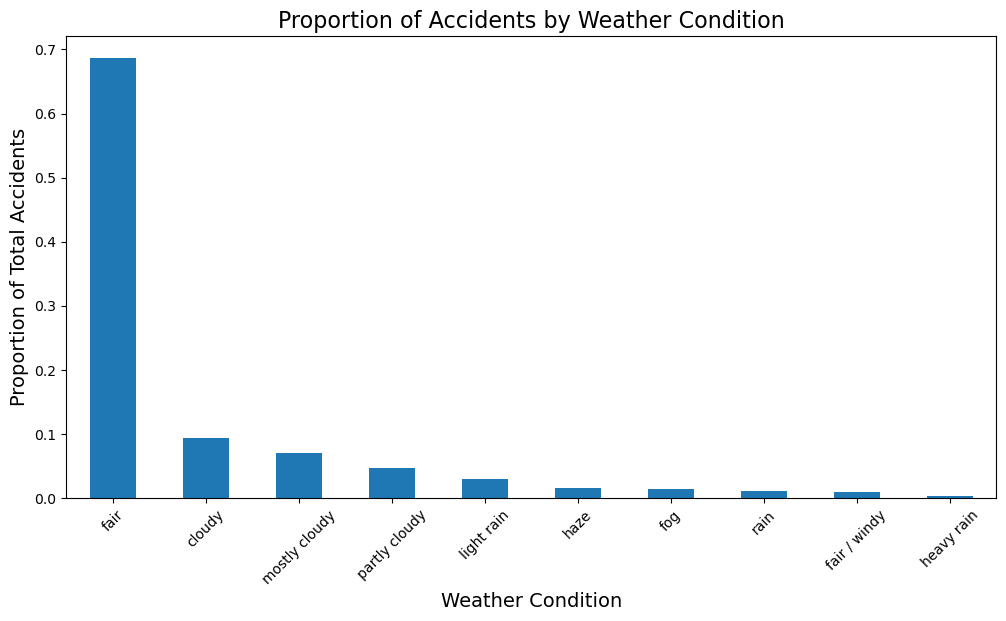

In [35]:
# Calculate the proportion of accidents by weather condition
weather_proportion = records_cleaned['Weather_Condition'].value_counts(normalize=True)[:10]

# Plot the proportions
plt.figure(figsize=(12,6))
weather_proportion.plot(kind='bar')
plt.title('Proportion of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Proportion of Total Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.show()


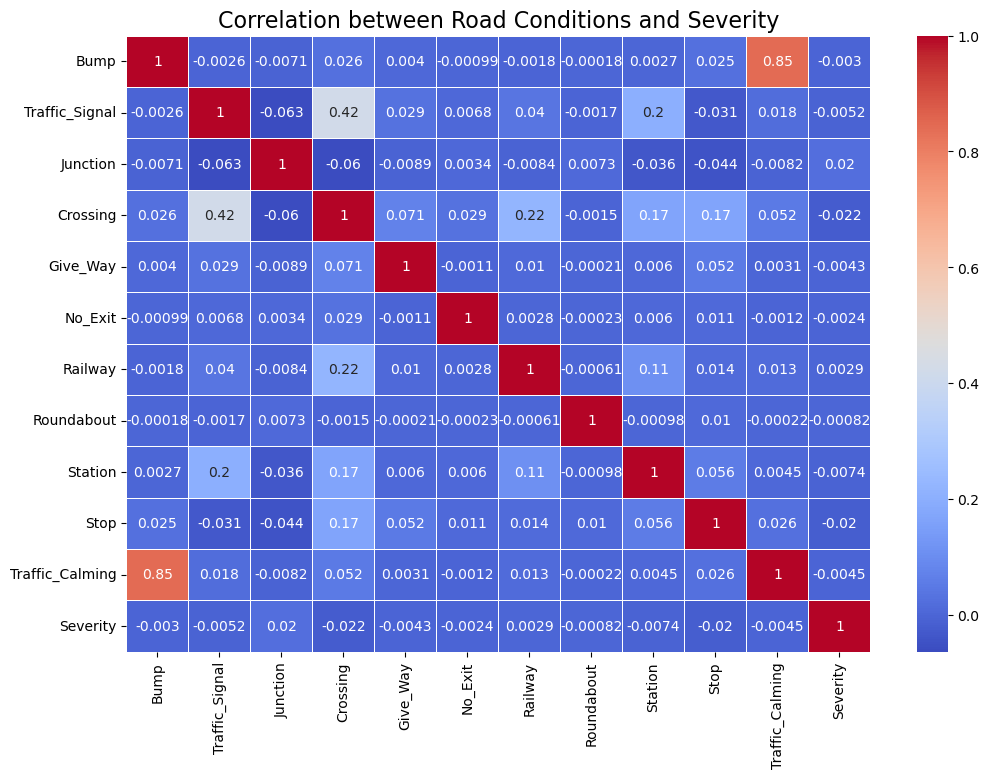

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#no accidents on turning loop 
# Assuming the column is now properly handled or verified
road_conditions = ['Bump', 'Traffic_Signal', 'Junction', 'Crossing', 'Give_Way', 'No_Exit', 
                   'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming']

# Combine road conditions with severity for correlation analysis
road_conditions_with_severity = records_cleaned[road_conditions + ['Severity']]

# Create a correlation matrix
correlation_matrix = road_conditions_with_severity.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation between Road Conditions and Severity', fontsize=16)
plt.show()


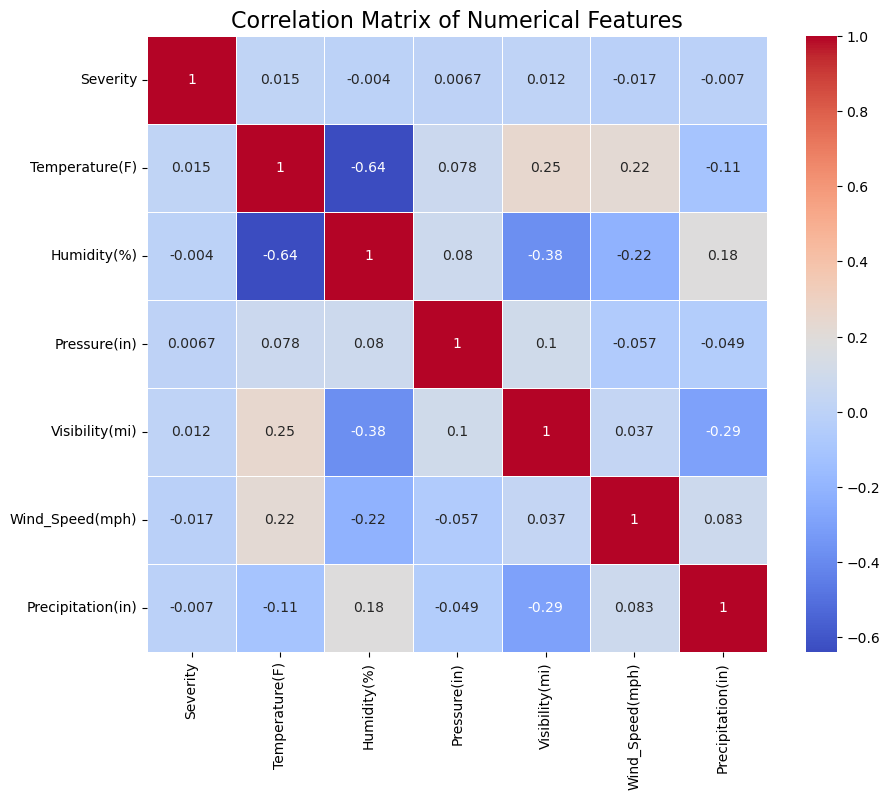

In [37]:
# Select only numerical columns to compute correlation
numeric_columns = ['Severity', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Compute the correlation matrix
correlation_matrix = records_cleaned[numeric_columns].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()


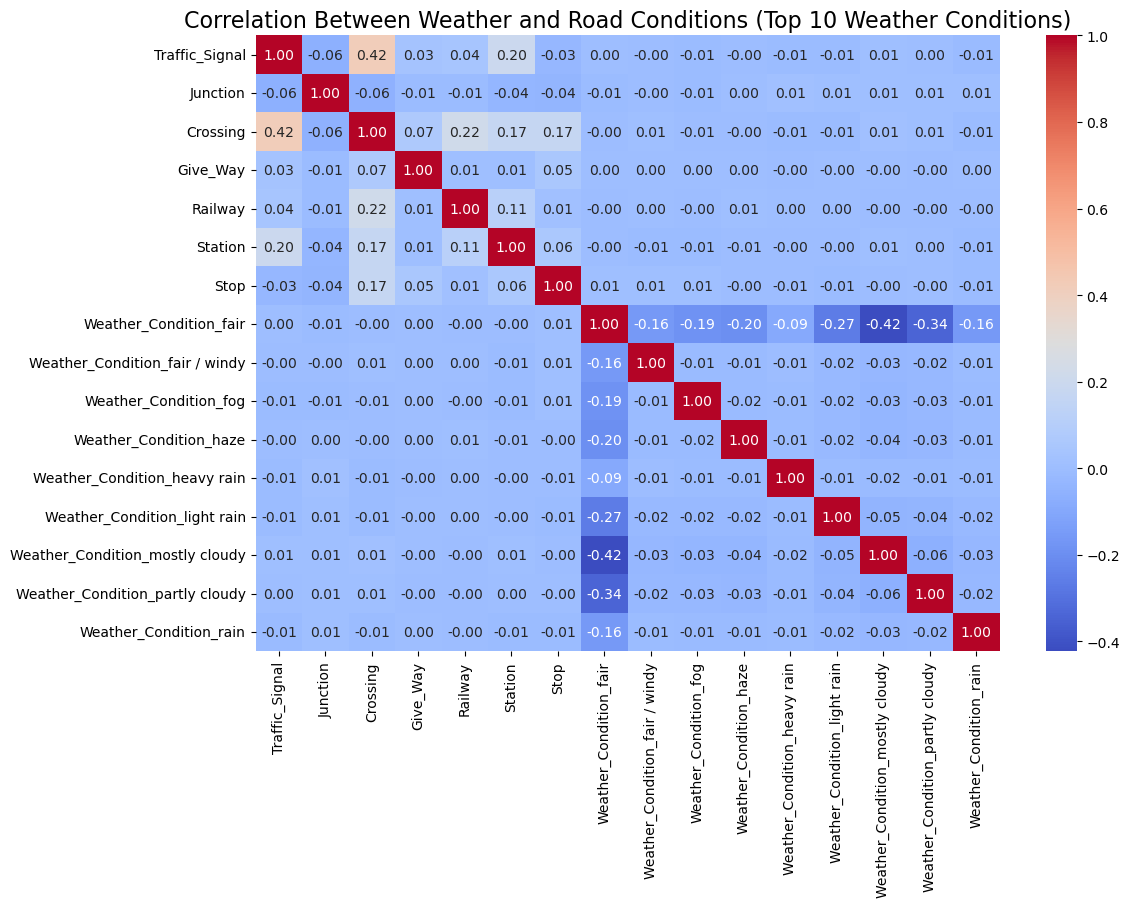

In [38]:
# Get the top 10 most common weather conditions
top_weather_conditions = records_cleaned['Weather_Condition'].value_counts().index[:10]

# Filter the dataset for only the top weather conditions
filtered_data = records_cleaned[records_cleaned['Weather_Condition'].isin(top_weather_conditions)]

# One-hot encode the filtered weather and road conditions
encoded_conditions = pd.get_dummies(filtered_data[['Weather_Condition', 'Traffic_Signal', 'Junction', 'Crossing', 'Give_Way', 'Railway', 'Station', 'Stop']], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = encoded_conditions.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Weather and Road Conditions (Top 10 Weather Conditions)', fontsize=16)
plt.show()


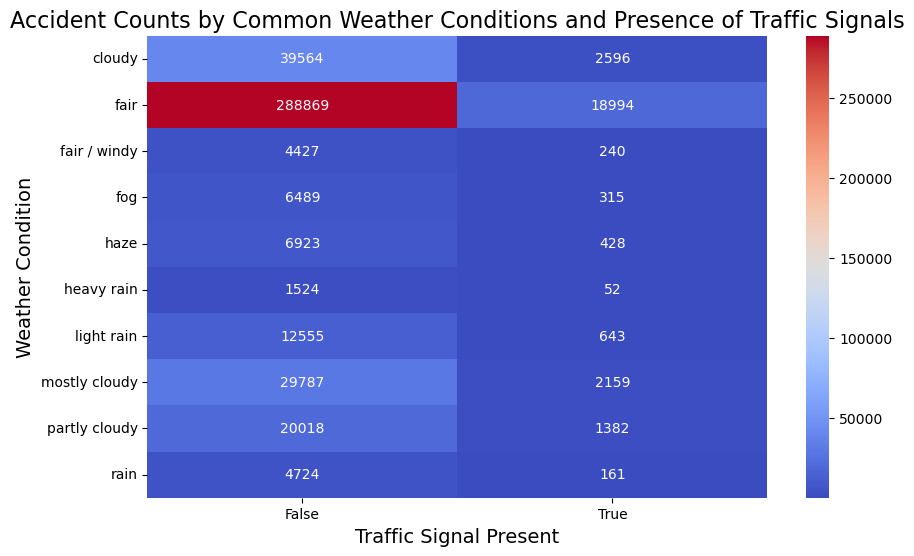

In [39]:
# Get the top 10 most common weather conditions
top_weather_conditions = records_cleaned['Weather_Condition'].value_counts().index[:10]

# Filter the dataset for only the top weather conditions
filtered_data = records_cleaned[records_cleaned['Weather_Condition'].isin(top_weather_conditions)]

# Create a pivot table showing the count of accidents by weather condition and traffic signals
weather_traffic_signal = filtered_data.pivot_table(index='Weather_Condition', columns='Traffic_Signal', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(weather_traffic_signal, cmap='coolwarm', annot=True, fmt='d')
plt.title('Accident Counts by Common Weather Conditions and Presence of Traffic Signals', fontsize=16)
plt.xlabel('Traffic Signal Present', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.show()


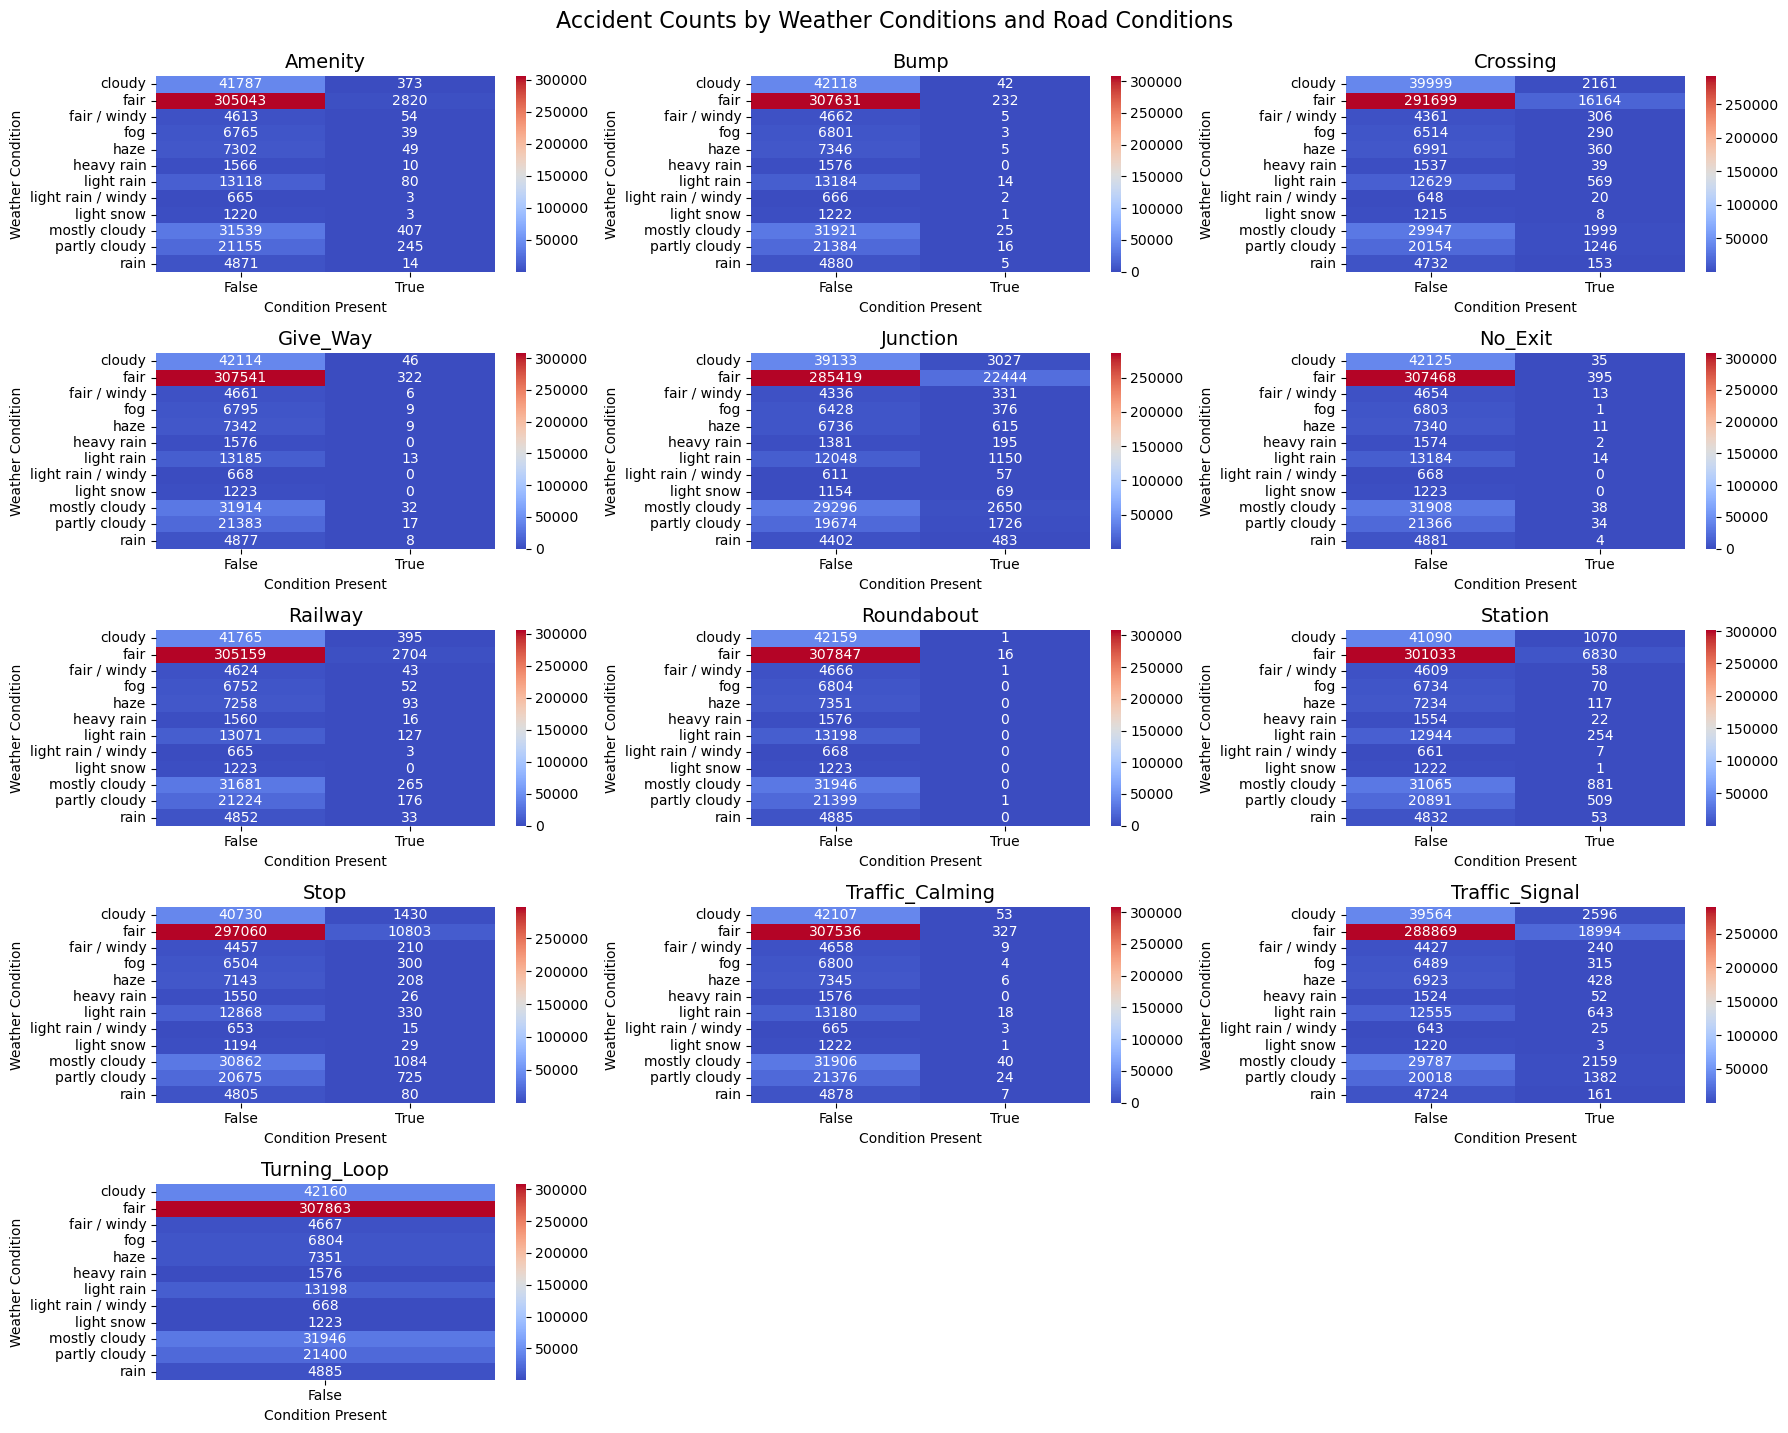

In [40]:
# Select the top common weather conditions
top_weather_conditions = records_cleaned['Weather_Condition'].value_counts().index[:12]
filtered_data = records_cleaned[records_cleaned['Weather_Condition'].isin(top_weather_conditions)]

# List of road conditions to analyze
road_conditions_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop'
]

# Dynamically adjust the number of rows based on the number of conditions
n_conditions = len(road_conditions_columns)
n_cols = 3
n_rows = (n_conditions // n_cols) + (n_conditions % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 14))  # Adjust size based on the number of conditions
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop over each road condition and create a subplot for it
for i, road_condition in enumerate(road_conditions_columns):
    # Create a pivot table showing the count of accidents by weather condition and road condition
    road_weather_pivot = filtered_data.pivot_table(index='Weather_Condition', columns=road_condition, aggfunc='size', fill_value=0)
    
    # Plot heatmap for each road condition in a subplot
    sns.heatmap(road_weather_pivot, cmap='coolwarm', annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{road_condition}', fontsize=14)
    axes[i].set_xlabel('Condition Present', fontsize=10)
    axes[i].set_ylabel('Weather Condition', fontsize=10)

# Remove any empty subplots if conditions are fewer than the grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout so plots do not overlap
plt.tight_layout()
plt.suptitle('Accident Counts by Weather Conditions and Road Conditions', fontsize=16, y=1.02)  # Set global title
plt.show()


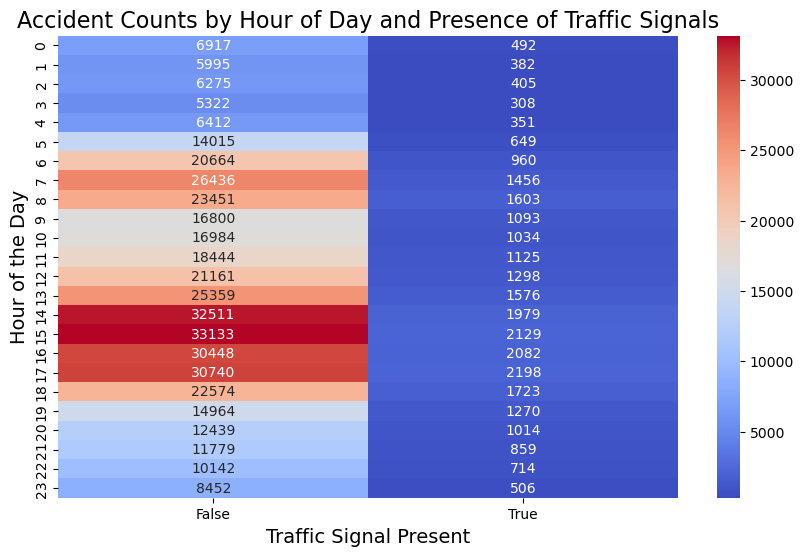

In [41]:
# Convert 'Start_Time' to datetime and extract hour
records_cleaned['Hour'] = pd.to_datetime(records_cleaned['Start_Time']).dt.hour

# Create a pivot table showing the count of accidents by hour of day and road conditions (e.g., Traffic_Signal)
hour_road_conditions = records_cleaned.pivot_table(index='Hour', columns='Traffic_Signal', aggfunc='size', fill_value=0)

# Plot a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(hour_road_conditions, cmap='coolwarm', annot=True, fmt='d')
plt.title('Accident Counts by Hour of Day and Presence of Traffic Signals', fontsize=16)
plt.xlabel('Traffic Signal Present', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.show()


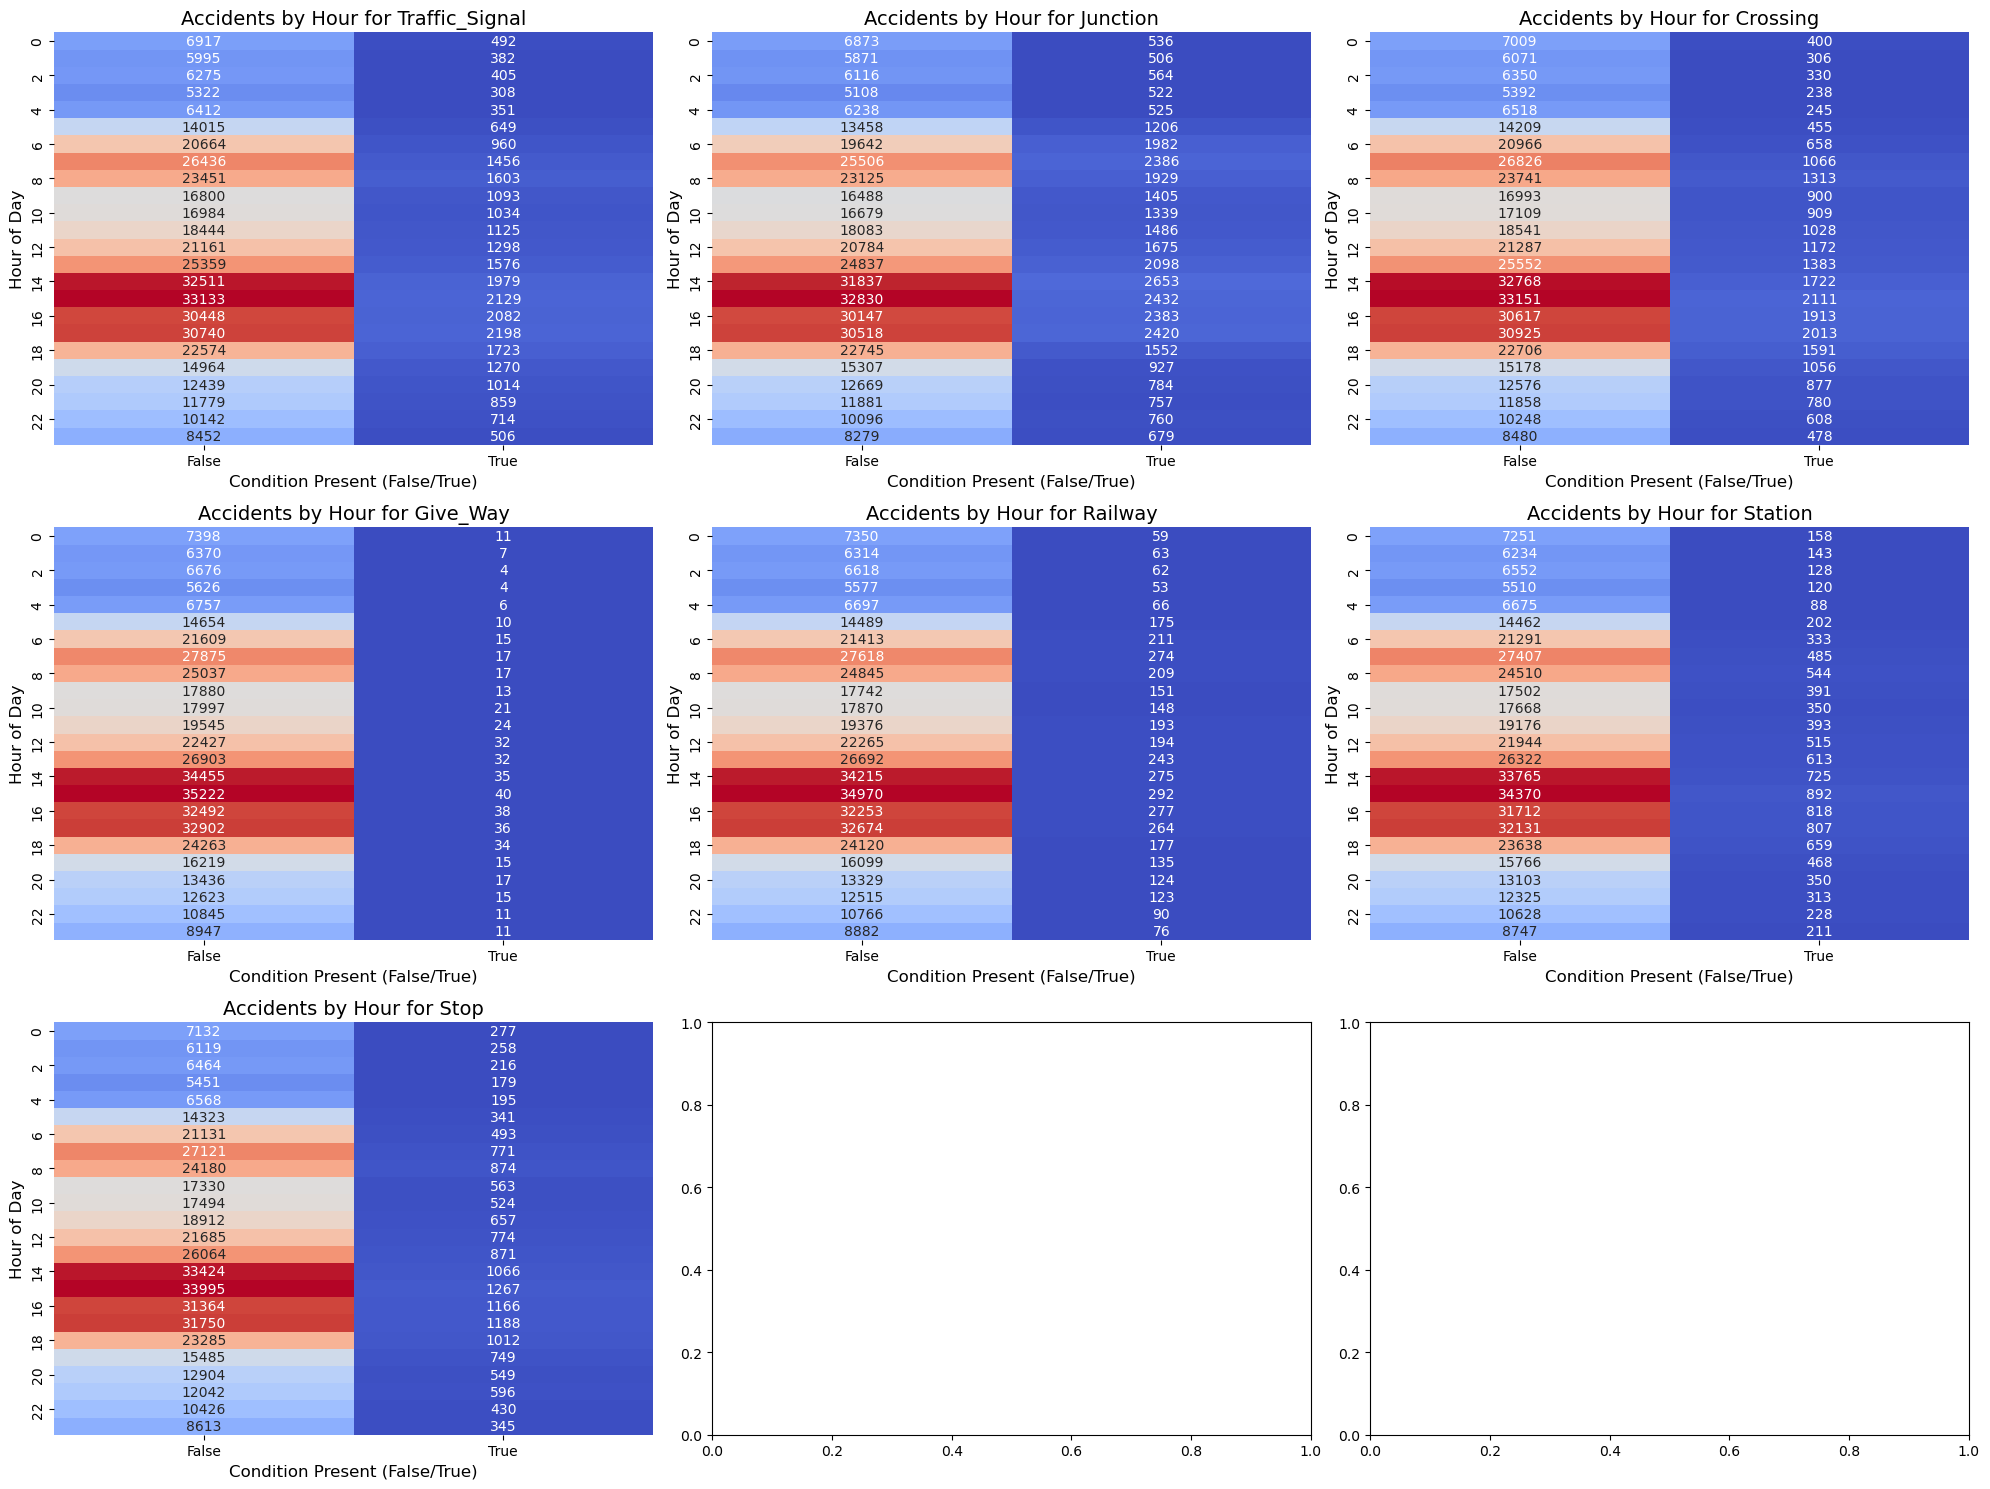

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for road conditions
road_conditions_columns = ['Traffic_Signal', 'Junction', 'Crossing', 'Give_Way', 'Railway', 'Station', 'Stop']

# Create a figure and subplots, increase the size for better readability
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))  # Adjust the number of rows and columns as needed
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Plot each road condition on a separate subplot
for i, condition in enumerate(road_conditions_columns):
    # Group by hour and count accidents where the condition is present (True) and absent (False)
    condition_data = records_cleaned.groupby(['Hour', condition]).size().unstack(fill_value=0)
    
    # Plot with accident counts and annotations
    sns.heatmap(condition_data, ax=axes[i], cmap='coolwarm', annot=True, fmt='d', cbar=False)
    axes[i].set_title(f'Accidents by Hour for {condition}', fontsize=14)
    axes[i].set_xlabel('Condition Present (False/True)', fontsize=12)
    axes[i].set_ylabel('Hour of Day', fontsize=12)

# Adjust layout to make sure everything fits well
plt.tight_layout()
plt.show()


/tmp/ipykernel_13584/322508995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = filtered_data['Start_Time'].dt.hour


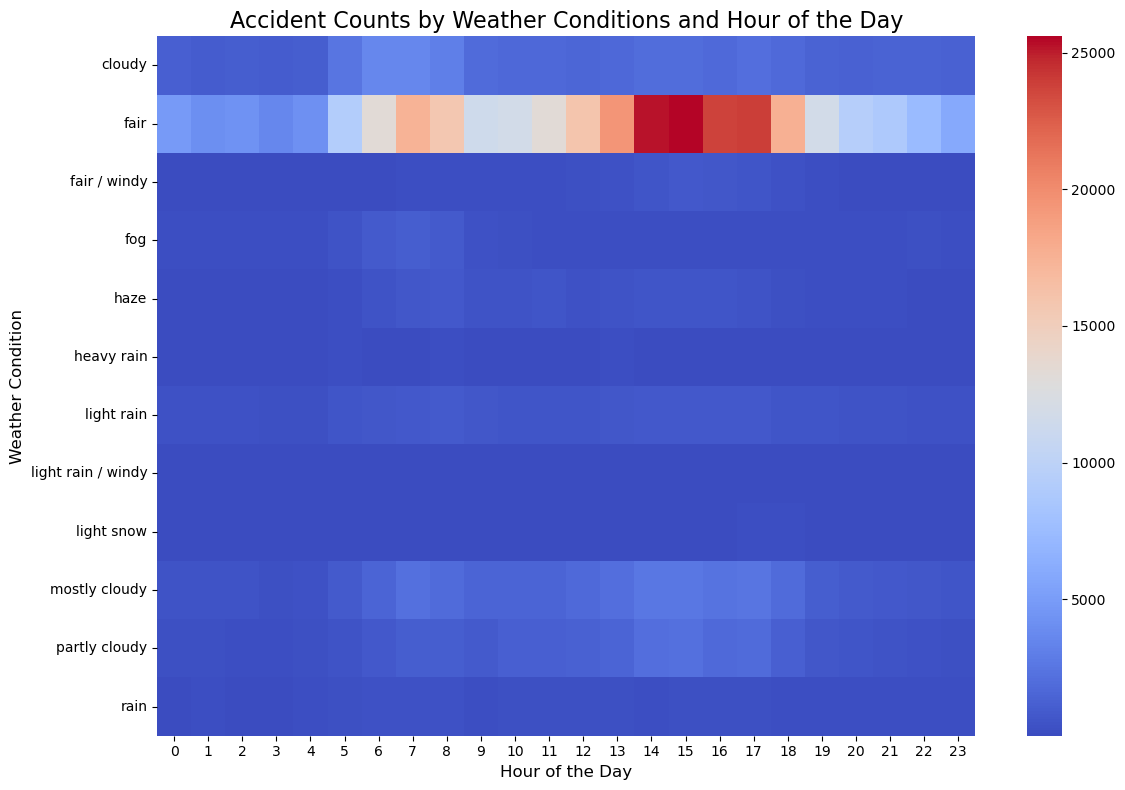

In [43]:
# Create a pivot table showing the count of accidents by weather condition and hour of the day
filtered_data['Hour'] = filtered_data['Start_Time'].dt.hour
weather_time_pivot = filtered_data.pivot_table(index='Weather_Condition', columns='Hour', aggfunc='size', fill_value=0)

# Create a figure for the heatmap
plt.figure(figsize=(12, 8))

# Plot heatmap with a more interpretable color palette (coolwarm)
sns.heatmap(weather_time_pivot, cmap='coolwarm', annot=False, fmt='d')

# Title and axis labels
plt.title('Accident Counts by Weather Conditions and Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Weather Condition', fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()


In [44]:
# Check the total number of rows (i.e., accidents) in your dataset
total_accidents = records_cleaned.shape[0]

print(f"Total number of accidents in the dataset: {total_accidents}")


Total number of accidents in the dataset: 448623


/tmp/ipykernel_13584/359386442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hour'] = filtered_data['Start_Time'].dt.hour


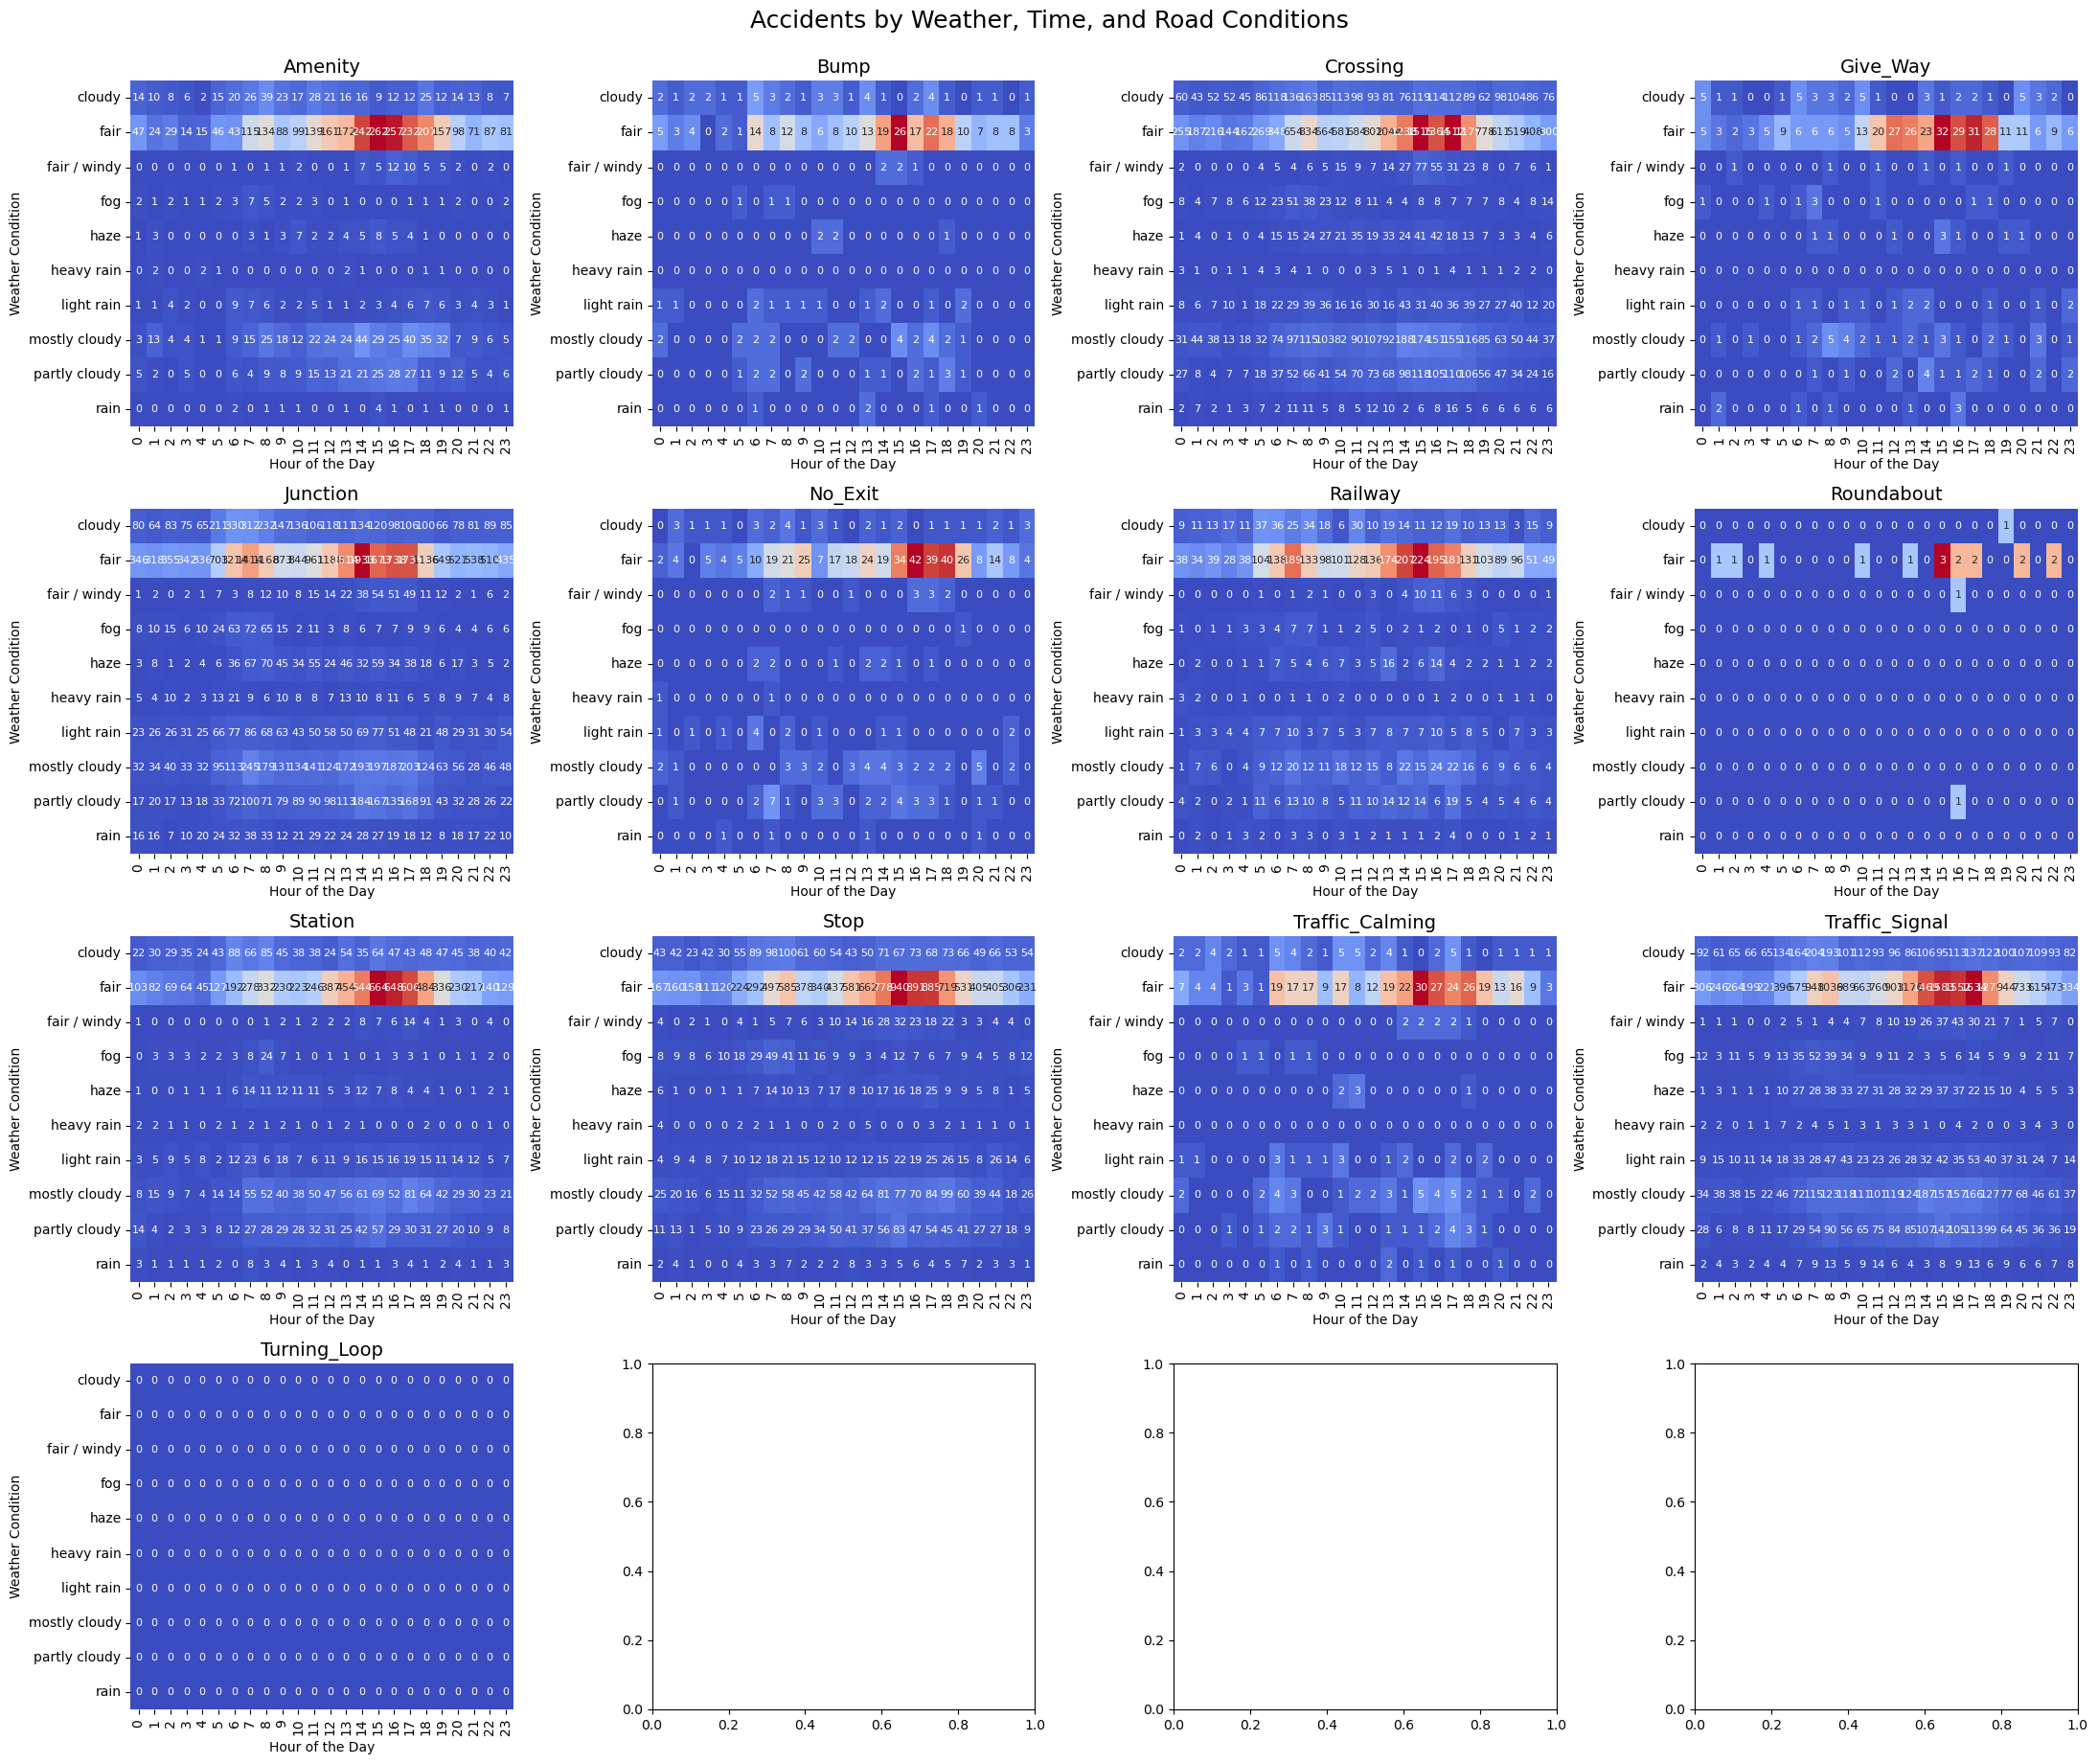

In [45]:
# Filter dataset to only include top common weather conditions
top_weather_conditions = records_cleaned['Weather_Condition'].value_counts().index[:10]
filtered_data = records_cleaned[records_cleaned['Weather_Condition'].isin(top_weather_conditions)]

# Add 'Hour' column for time-based analysis
filtered_data['Hour'] = filtered_data['Start_Time'].dt.hour

# Road conditions to include in the plot
road_conditions_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
    'Traffic_Signal', 'Turning_Loop']

# Set up a grid of subplots for each road condition
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(22, 18))  # Adjust rows/cols for fitting all plots
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over road conditions and plot heatmaps
for i, road_condition in enumerate(road_conditions_columns):
    # Create a pivot table showing the count of accidents by weather, hour, and road condition
    pivot = filtered_data.pivot_table(index='Weather_Condition', columns='Hour', 
                                      values=road_condition, aggfunc='sum', fill_value=0)
    
    # Plot heatmap for each road condition in a subplot
    sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='d', ax=axes[i], cbar=False, annot_kws={"size": 8})
    axes[i].set_title(f'{road_condition}', fontsize=14)
    axes[i].set_xlabel('Hour of the Day', fontsize=10)
    axes[i].set_ylabel('Weather Condition', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.suptitle('Accidents by Weather, Time, and Road Conditions', fontsize=18, y=1.02)  # Set global title
plt.show()


In [46]:
import plotly.express as px
import pandas as pd

# Assuming 'records_cleaned' is your dataset
# Randomly sample 1000 points from your dataset
subset_data = records_cleaned[['Start_Lat', 'Start_Lng', 'Severity']].dropna().sample(n=1000, random_state=42)

# Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(subset_data, 
                    x='Start_Lat', 
                    y='Start_Lng', 
                    z='Severity', 
                    color='Severity',  # Color code by Severity
                    color_continuous_scale=px.colors.sequential.Viridis,  # Optional: Choose a color scale
                    labels={'Start_Lat':'Latitude', 'Start_Lng':'Longitude', 'Severity':'Accident Severity'},
                    title='Interactive 3D Scatter Plot of Latitude, Longitude, and Severity')

# Show the interactive plot
fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [36]:
import folium

# Sample a smaller subset of data (e.g., 1000 rows)
sampled_data = records_cleaned.sample(n=1000, random_state=42)

# Create a map centered around the mean latitude and longitude
map_center = [sampled_data['Start_Lat'].mean(), sampled_data['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add accident locations to the map
for index, row in sampled_data.iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save the map to an HTML file
m.save('sampled_accident_map.html')

# To display the map in a Jupyter notebook, if you are using one
m


In [37]:
from folium.plugins import HeatMap

# Prepare data for heatmap (using sampled data)
accident_locations = sampled_data[['Start_Lat', 'Start_Lng']].dropna()

# Create a map
heatmap_map = folium.Map(location=[accident_locations['Start_Lat'].mean(), accident_locations['Start_Lng'].mean()], zoom_start=6)

# Add heatmap to the map
HeatMap(accident_locations.values.tolist(), radius=10).add_to(heatmap_map)

# Save heatmap to HTML
heatmap_map.save('accident_heatmap.html')

# To display the map in Jupyter notebook (optional)
heatmap_map


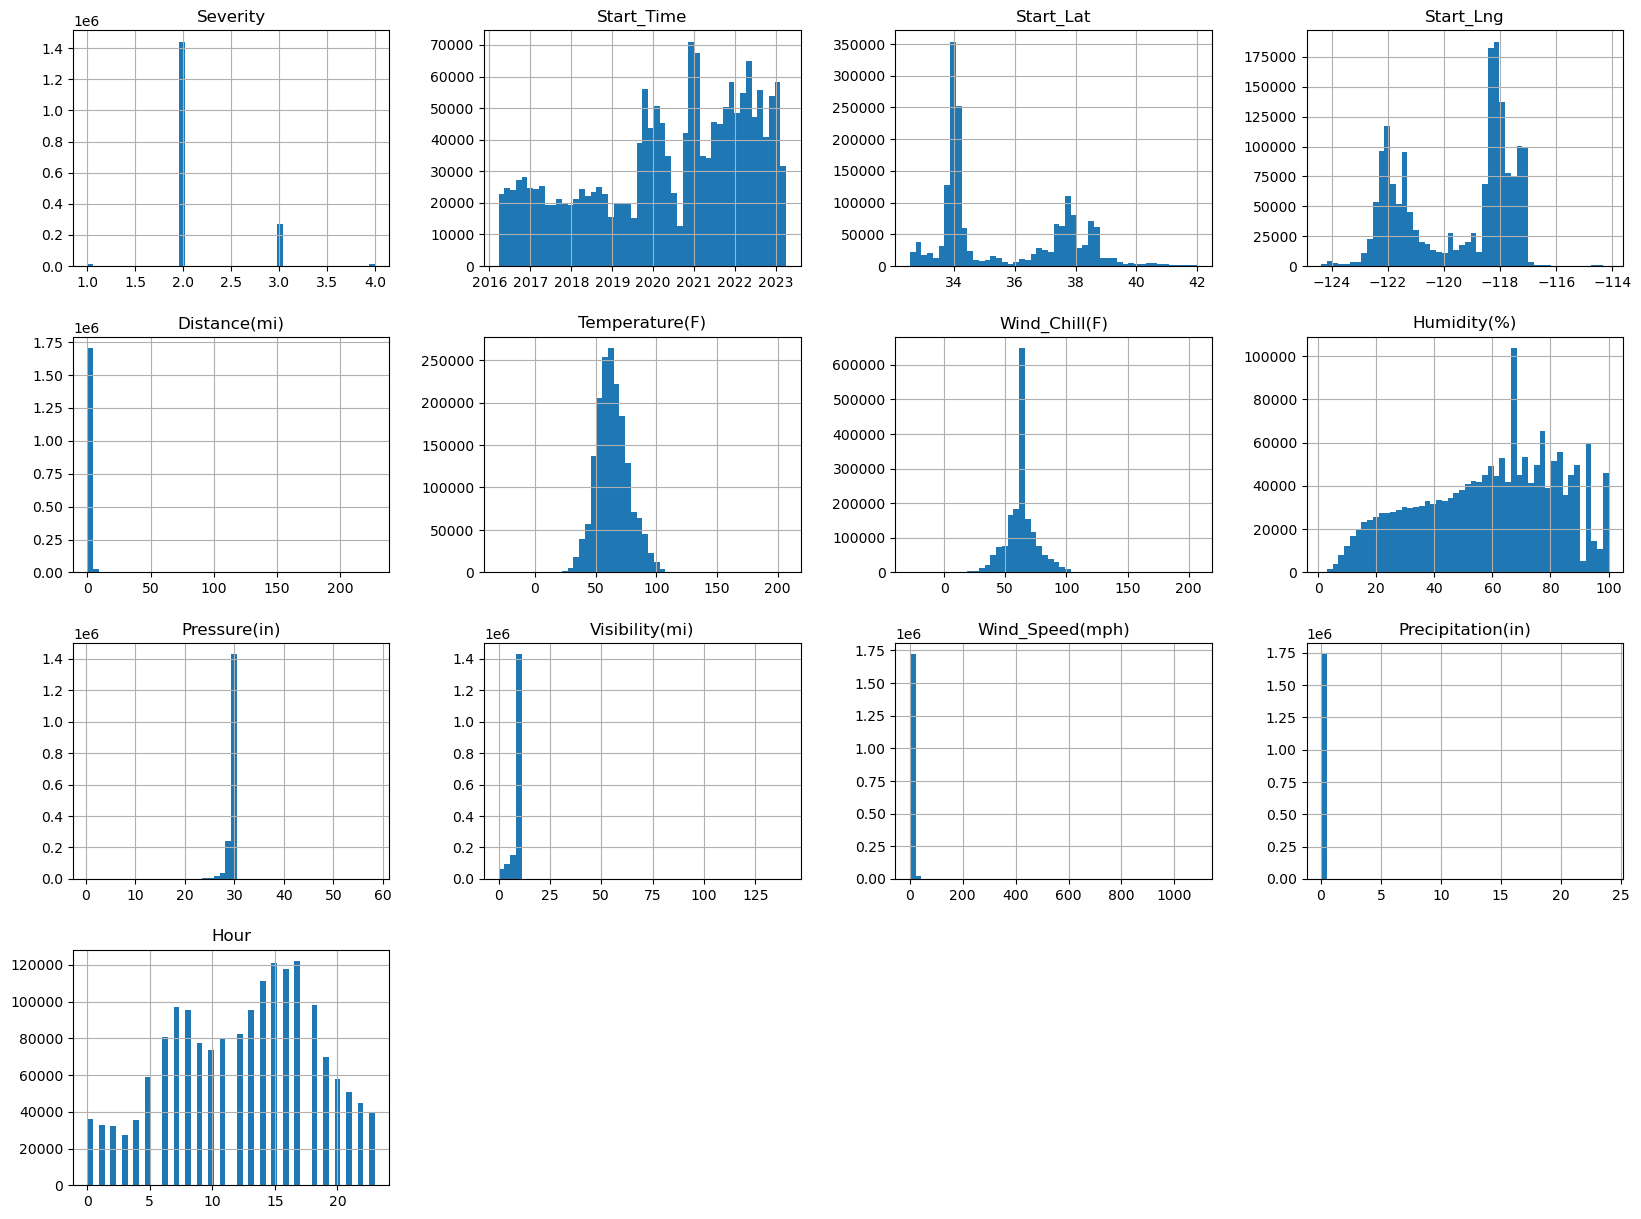

In [57]:
records_cleaned.hist(bins=50, figsize=(20,15))
plt.show()